## What is Matplotlib?

> matplotlib is a library for making 2D plots of arrays in Python
>
> *-matplotlib.org/users/intro.html*

In [60]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import pandas as pd

In [61]:
matplotlib.__version__

'3.6.0'

In [62]:
alta = pd.read_csv('../data/snow-alta-1990-2017.csv')
alta['DATE'] = pd.to_datetime(alta.DATE)

In [63]:
weekly = (alta
    .set_index('DATE')
    .resample('w')
    .agg({'LATITUDE': 'first', 'LONGITUDE': 'last',
          'SNOW': 'mean', 'SNWD': 'mean',
         'TMAX': 'max', 'TMIN': 'min', 'TOBS': 'mean'}))

x = weekly.index
y = weekly.SNWD
alta_x = x
alta_y = y

<AxesSubplot: xlabel='DATE'>

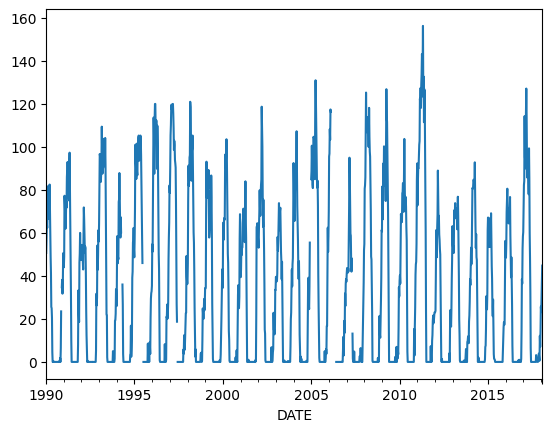

In [64]:
weekly.SNWD.plot() #pandas direct

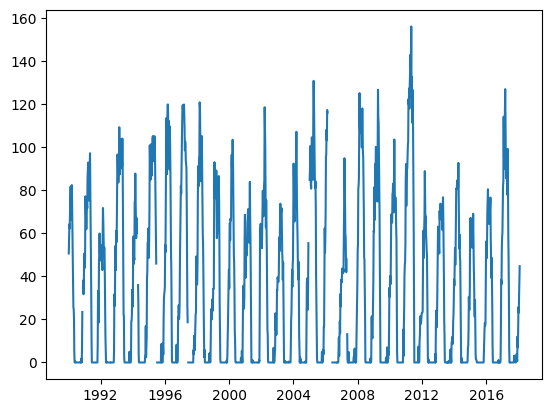

In [65]:
plt.plot(x,y)

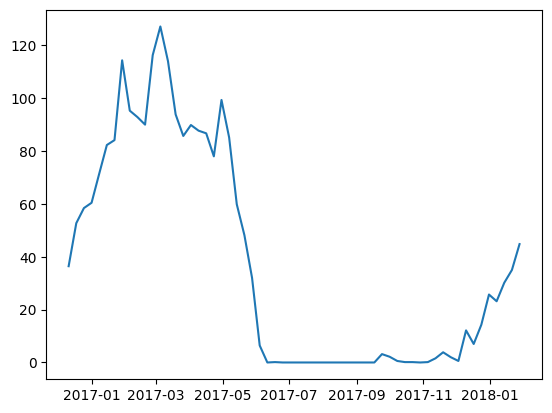

In [66]:
# last 60 weeks
weeks = 60
x_weeks = x[-weeks:]
y_weeks = y.iloc[-weeks:] # not a date, so iloc used
plt.plot(x_weeks, y_weeks)

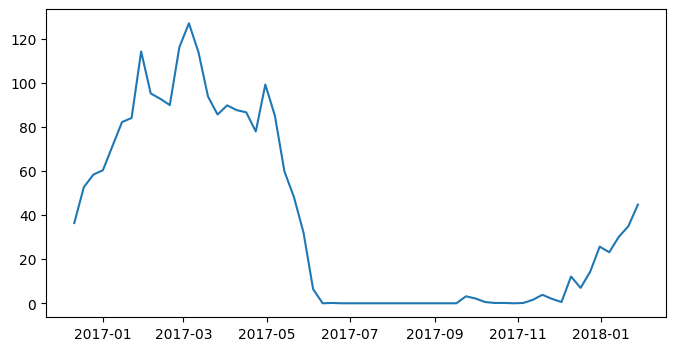

In [67]:
# Increase size
# last 60 weeks
fig, ax = plt.subplots(figsize=(8,4))
weeks = 60
x_weeks = x[-weeks:]
y_weeks = y.iloc[-weeks:]
ax.plot(x_weeks, y_weeks)

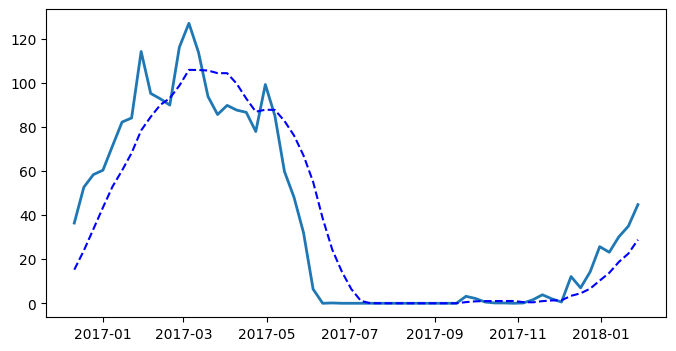

In [68]:
# Add 6 week MA
# Increase size
# last 60 weeks
fig, ax = plt.subplots(figsize=(8,4))
weeks = 60
x_weeks = x[-weeks:]
y_weeks = y.iloc[-weeks:]
y_weeks_ma = y.rolling(6).mean().iloc[-weeks:]

ax.plot(x_weeks, y_weeks, linewidth=2)
ax.plot(x_weeks, y_weeks_ma, color='b', linestyle='--')

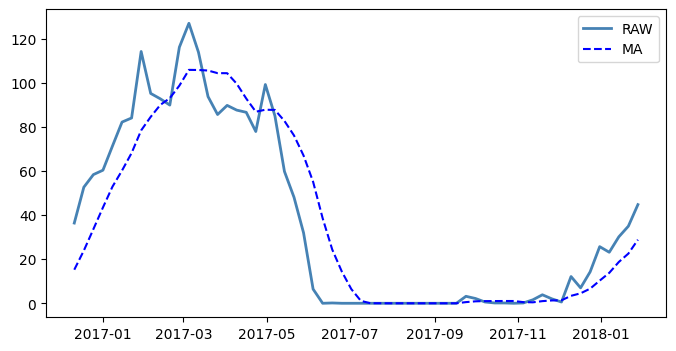

In [69]:
# Add legend
# Add 6 week MA
# Increase size
# last 60 weeks
fig, ax = plt.subplots(figsize=(8,4))
weeks = 60
x_weeks = x[-weeks:]
y_weeks = y.iloc[-weeks:]
y_weeks_ma = y.rolling(6).mean().iloc[-weeks:]

ax.plot(x_weeks, y_weeks, linewidth=2, color='steelblue' , label='RAW')
ax.plot(x_weeks, y_weeks_ma, color='b', linestyle='--', label="MA")
ax.legend()

Text(17328.0, 10.0, 'Min 0.0')

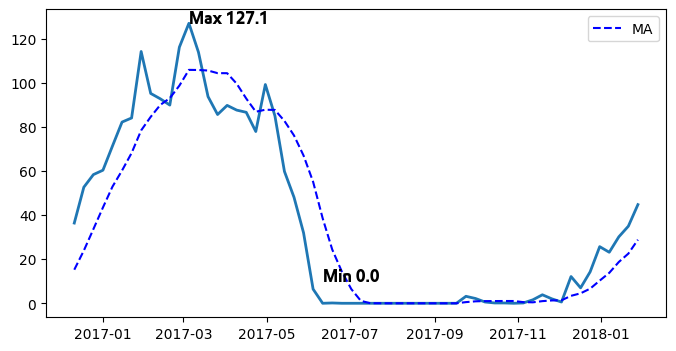

In [70]:
# Annotate High
# Add legend
# Add 6 week MA
# Increase size
# last 60 weeks
fig, ax = plt.subplots(figsize=(8,4))
weeks = 60
x_weeks = x[-weeks:]
y_weeks = y.iloc[-weeks:]
y_weeks_ma = y.rolling(6).mean().iloc[-weeks:]

ax.plot(x_weeks, y_weeks, linewidth=2)
ax.plot(x_weeks, y_weeks_ma, color='b', linestyle='--', label="MA")
ax.legend()

max_val = max(y_weeks) # position determination for annotation 
max_idx = y_weeks.idxmax() # position determination for annotation
ax.annotate(f'Max {max_val:.1f}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=12, font='emprint')

min_val = min(y_weeks)
min_idx = y_weeks.idxmin()
ax.annotate(f'Min {min_val:.1f}', xy=(mdt.date2num(min_idx), min_val+10),
           weight='bold', size=12, font='emprint')

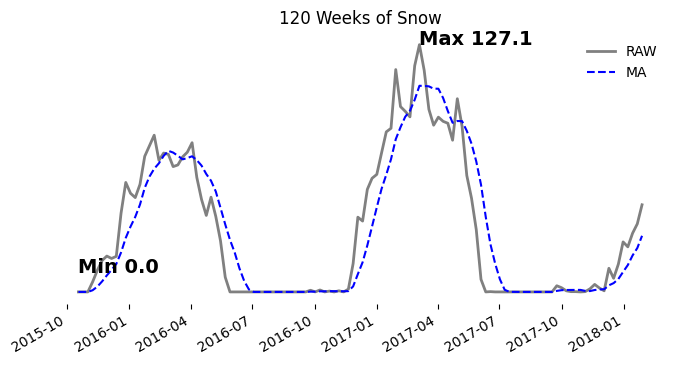

In [71]:
# Add title, remove spines
# Annotate High
# Add legend
# Add 6 week MA
# Increase size
# last 60 weeks
fig, ax = plt.subplots(figsize=(8,4))
weeks = 120
x_weeks = x[-weeks:]
y_weeks = y.iloc[-weeks:]
y_weeks_ma = y.rolling(6).mean().iloc[-weeks:]

ax.plot(x_weeks, y_weeks, linewidth=2, color='grey', label='RAW')
ax.plot(x_weeks, y_weeks_ma, color='b', linestyle='--', label="MA")
ax.legend(frameon=False)

max_val = max(y_weeks)
max_idx = y_weeks.idxmax()
ax.annotate(f'Max {max_val:.1f}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=14)


min_val = min(y_weeks)
min_idx = y_weeks.idxmin()
ax.annotate(f'Min {min_val:.1f}', xy=(mdt.date2num(min_idx), min_val+10),
           weight='bold', size=14)

ax.get_yaxis().set_visible(False)
for side in ['left', 'top', 'right', 'bottom']:
    ax.spines[side].set_visible(False)
ax.set_title(f'{weeks} Weeks of Snow')

fig.autofmt_xdate()

In [72]:
# save
fig.savefig('demo-plot.png', dpi=300)

In [73]:
# Non-Jupyter - render plot
plt.show()

## Interfaces

Matplotlib has an object-oriented interface to create *figures*, add *axes*, and plot on the *axes*. In addition there is a *state machine* interface found in the ``pyplot`` package. This interface mimics MATLAB.

OO Interface:

* **Figure** - The canvas. You can add axes to it.
* **Axes** - This is a plot. It can have a title, an x label, and a y label. A 2D plot has 2 axis. A 3D plot has 3.
* **Axis** - (Note spelling) - These hold ticks, ticklabels, and define limits. You can customize a *Locator* and *Formatter* to adjust the position and labels.
* **Artist** - (Confusing term) for describing what you can draw on a plot.
* **Backend** - This is the rendering engine for creating a plot (pdf, png, svg, etc) as well as an interface (pygtk, wx, macos, inline). For Jupyter, we specify the cell magic ``%matplotlib inline``

C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\1256007467.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


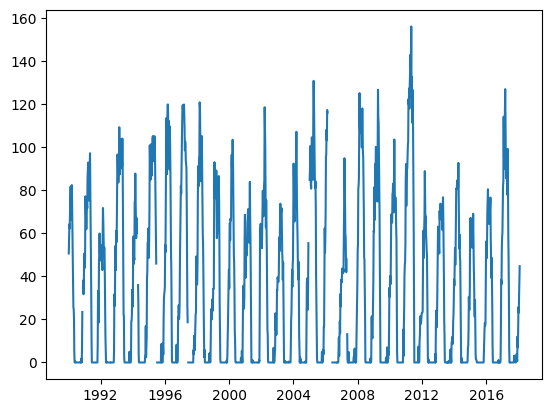

In [74]:
# Object Oriented Example
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.core.display import display

fig = Figure()
FigureCanvas(fig)  # Figure needs a canvas (pyplot does this for us)
ax = fig.add_subplot(111)
ax.plot(x, y)
display(fig)

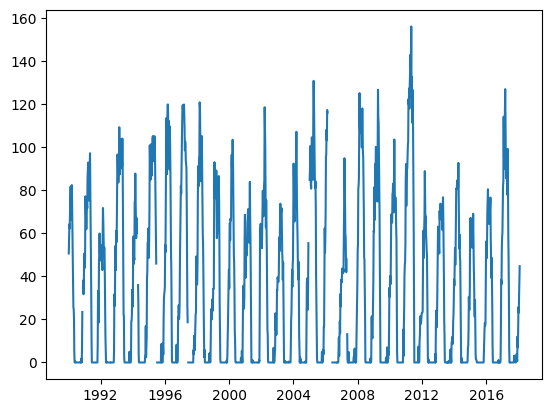

In [75]:
# pyplot example
import matplotlib.pyplot as plt
plt.plot(x,y)

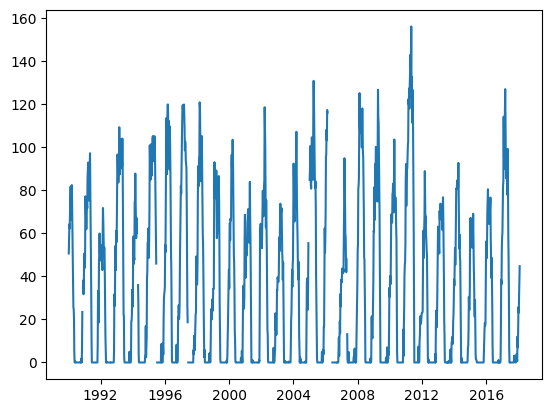

In [76]:
# In practice I create figures or axes w/ pyplot
ax = plt.subplot(111)
# fig, ax = plt.subplots()  # to get figure as well
ax.plot(x, y)

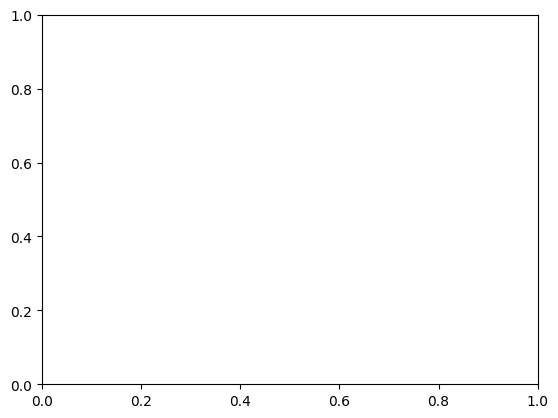

In [77]:
plt.gca() # get current axes
plt.gcf() # get current fig
plt.gci() # get current artist

In [78]:
print(dir(plt))

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Enum', 'ExitStack', 'Figure', 'FigureBase', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MouseButton', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotSpec', 'Text', 'TickHelper', 'Widget', '_NON_PLOT_COMMANDS', '_REPL_DISPLAYHOOK', '_ReplDisplayHook', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_draw_if_interactive', '_backend_mod', '_copy_docstring_and_deprecators', '_docstring', '_draw_all_if_interactive', '_get_backend_mod', '_get_required_interactive_framework', '_interactive_bk', '_log', '_pylab_helpers

The ``plt`` interface has a few functions (``figure``, ``legend``, ``title``, ``xlabel``, ``xlim``, ``xscale``, ``xticks``, ``ylabel``, ``ylim``, ``yscale``, ``yticks``), that have corresponding accessors on ``ax``. Ie ``ax.get_xticks()``. In addition you can use ``ax.set(title='foo', xlabel='bar', xlim=(1,100))`` to set multiple attributes.

## Lab Data
This section will load the lab data.

In [79]:
#%%time
nyc = pd.read_csv('../data/central-park-raw.csv', parse_dates=[0])
nyc_weekly = (nyc
 .rename(columns={'Mean TemperatureF': 'temp'})
 .set_index('EST')
 .resample('w')
 ['temp']
 .mean()
)

In [80]:
nyc_weekly

EST
2006-01-01    37.000000
2006-01-08    38.000000
2006-01-15    44.571429
2006-01-22    41.142857
2006-01-29    39.857143
                ...    
2014-12-07    42.571429
2014-12-14    36.714286
2014-12-21    39.428571
2014-12-28    47.571429
2015-01-04    33.333333
Freq: W-SUN, Name: temp, Length: 471, dtype: float64

## Exercise: Interface
Using the ``nyc`` data:
* Create a ``nyc_weekly`` variable that is a series with a weekly index and the average temp
* Plot the average temp on a weekly level using the OO style interface
* Plot the average temp on a weekly level using the ``plt`` style interface
* Bump the figure size up to 10 inches wide by 8 inches tall in both plots

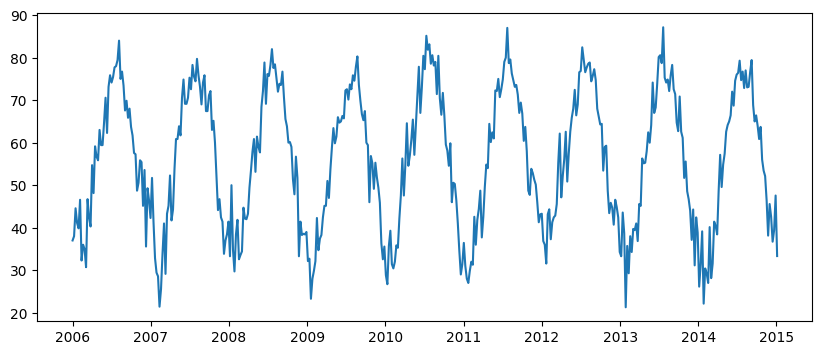

In [81]:
fig = Figure(figsize=(10,4))
FigureCanvas(fig)  # Figure needs a canvas (pyplot does this for us)
ax = fig.add_subplot(111)
ax.plot(nyc_weekly)
display(fig)

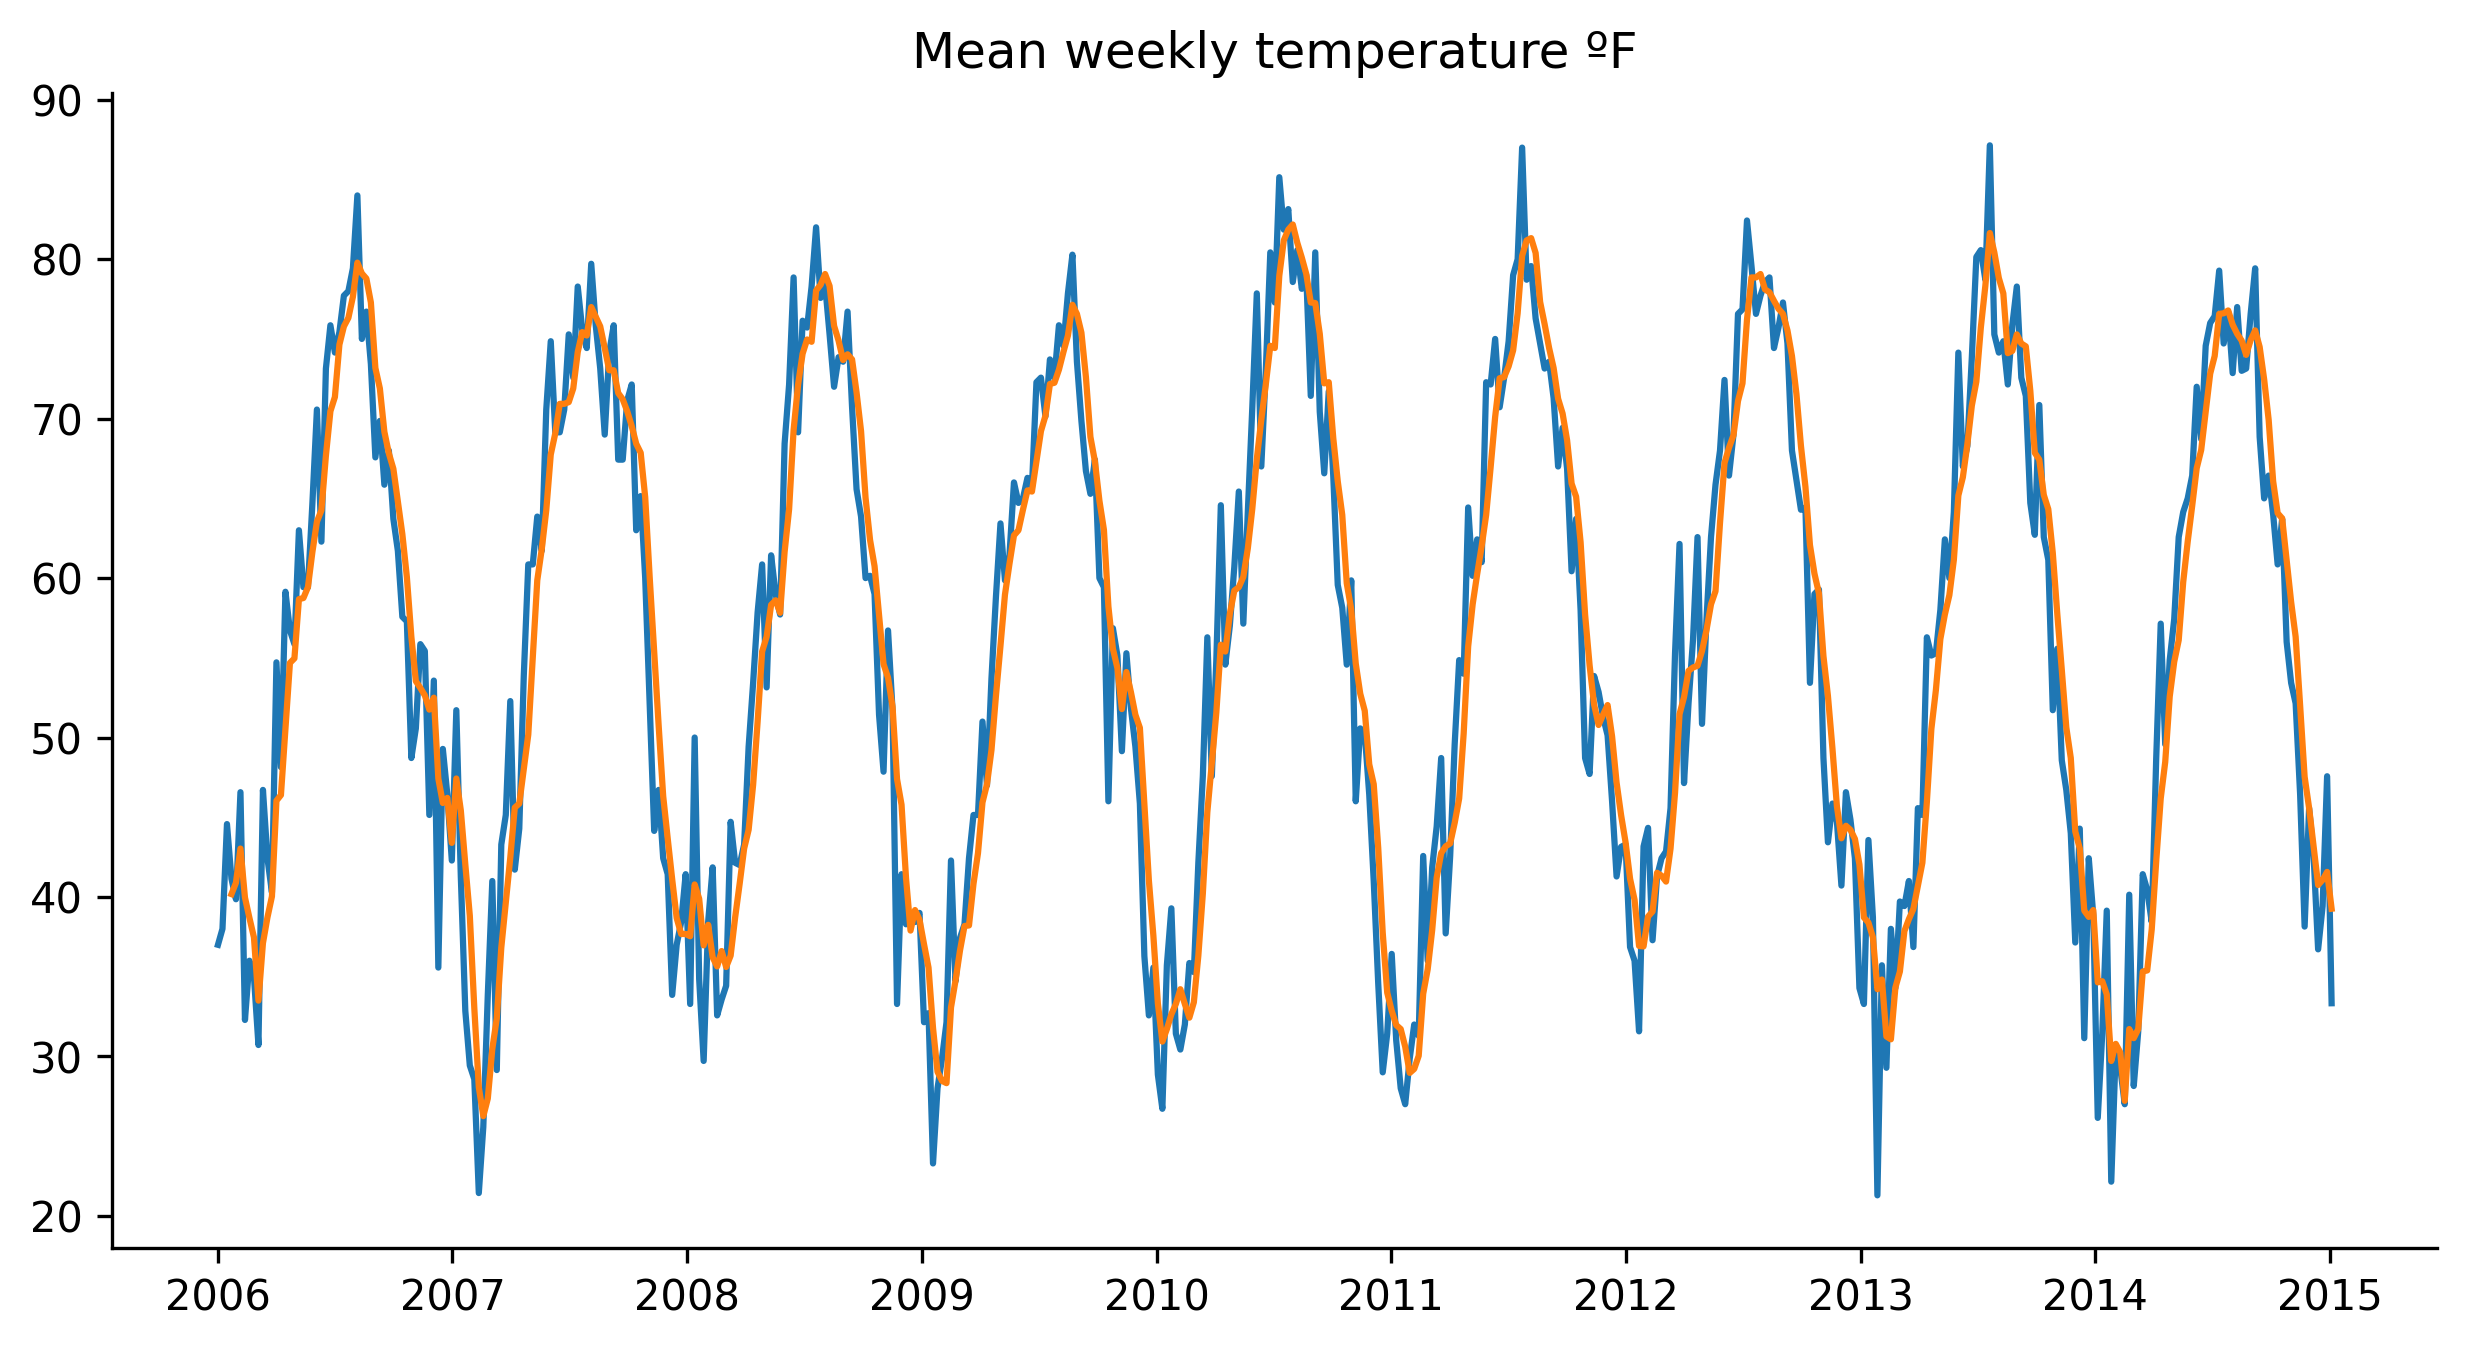

In [82]:
fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,5), dpi=300)
ax.plot(nyc_weekly)
ax.plot(nyc_weekly.rolling(4).mean())
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)

_ = ax.set_title(f'Mean weekly temperature ºF')


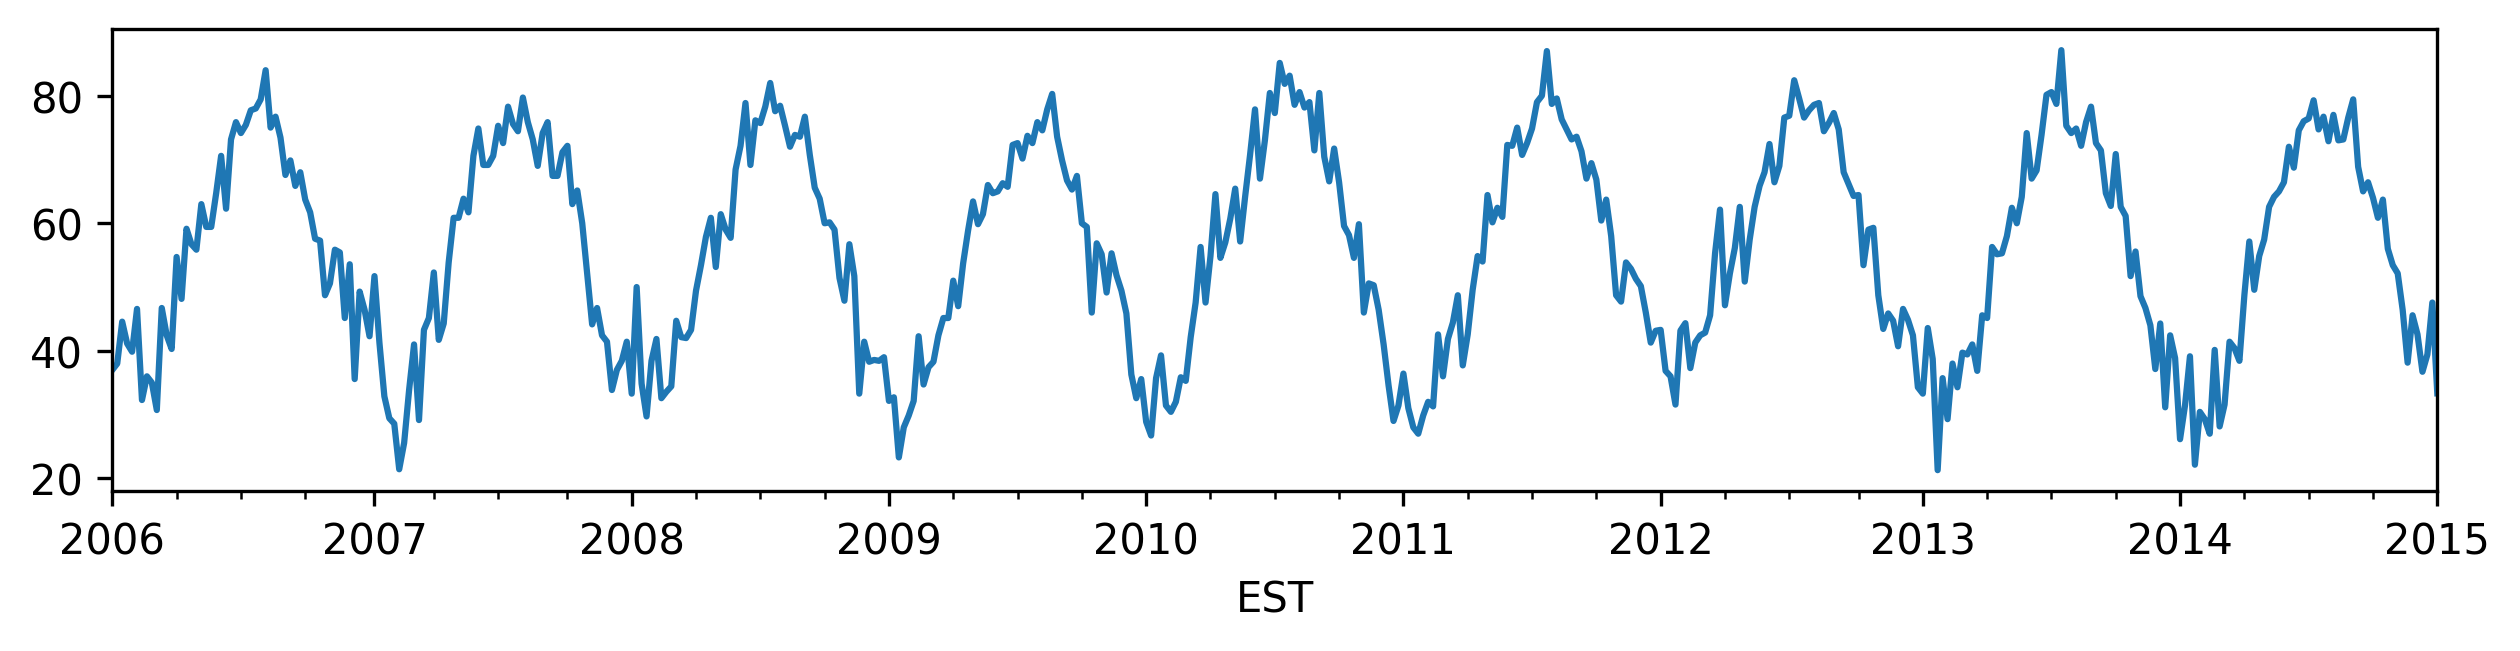

In [83]:
fig, ax = plt.subplots(figsize=(10,2), dpi=300)
_ = nyc_weekly.plot(ax=ax)

## Basic Plots
Matplotlib supports a variety of plots out of the box.

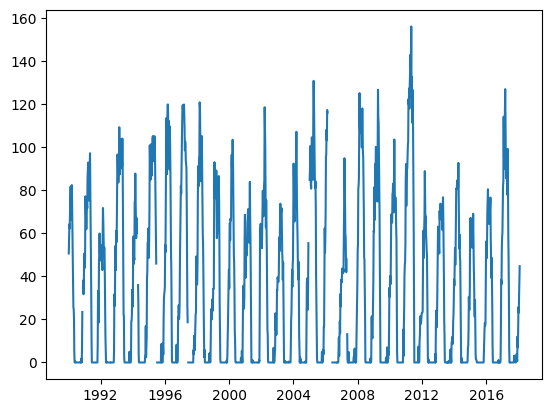

In [84]:
# Line Plot
fig, ax = plt.subplots()
ax.plot(x, y)

<BarContainer object of 1465 artists>

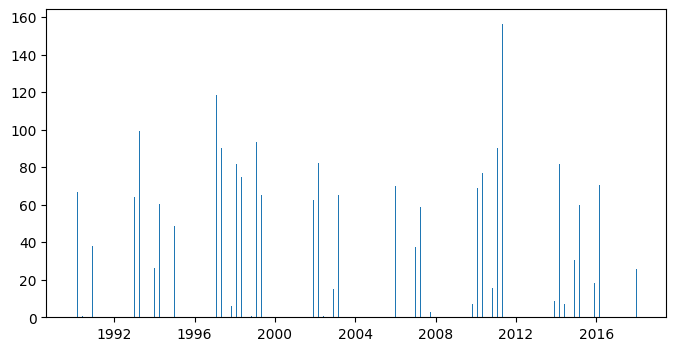

In [85]:
# Bar Plot
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y)

<AxesSubplot: >

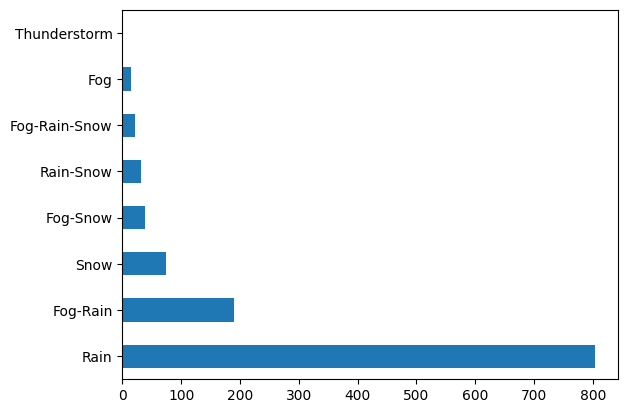

In [86]:
nyc[' Events'].value_counts().plot.barh()

<BarContainer object of 200 artists>

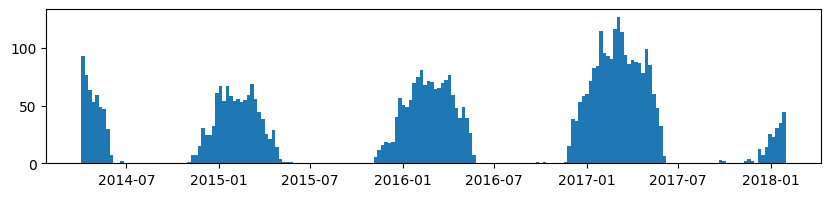

In [87]:
fig, ax = plt.subplots(figsize=(10,2))
(y
 .iloc[-200:]
#  .plot
#  .bar(width=1)
 .pipe(lambda s: plt.bar(s.index, s, width=7))
) # pandas conversion into categorical labels creates the craze x axis

<BarContainer object of 1465 artists>

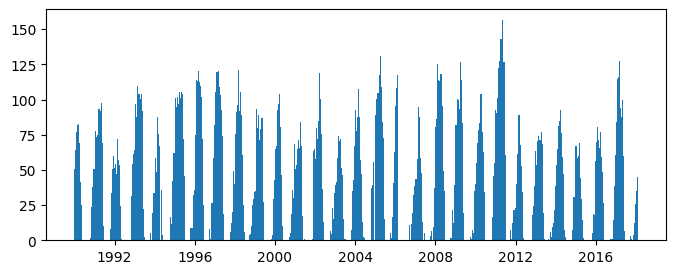

In [88]:
# Bar Plot
# width may need to be tweaked
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(x, y, width=20)

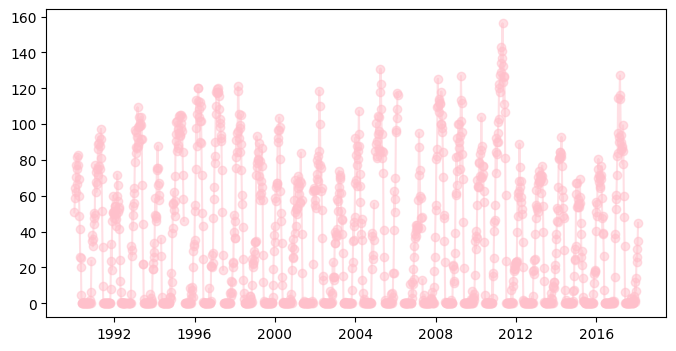

In [89]:
# Scatter Plot - Using .scatter can be slower than plot. Use .scatter when you want to 
# tweak attribute
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, marker='o', alpha=.5, color='pink')

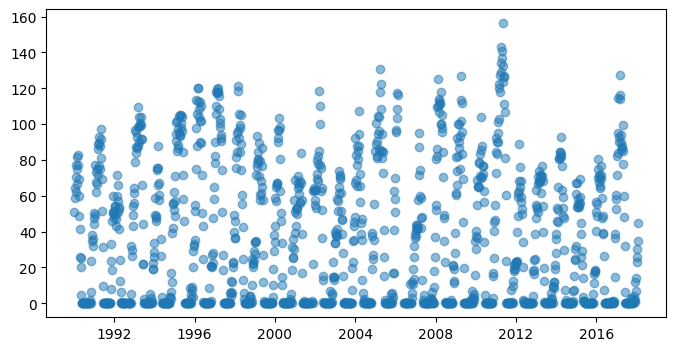

In [90]:
# Scatter Plot - Using .scatter can be slower than plot. Use .scatter when you want to 
# tweak attribute
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(x, y, marker='o', alpha=.5)

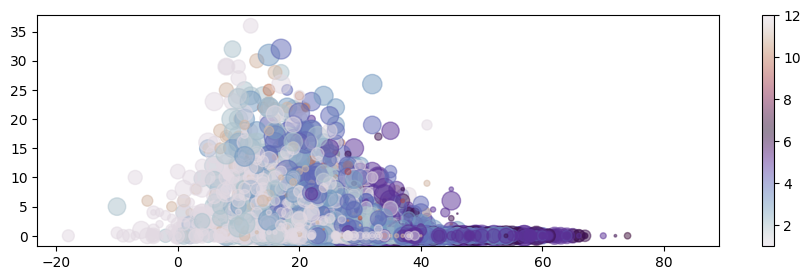

In [91]:
fig, ax = plt.subplots(figsize=(11,3))
s = ax.scatter(alta.TOBS, alta.SNOW, c=alta.DATE.dt.month,
           s=alta.SNWD**1.1,
           marker='o', 
           alpha=.5,
           cmap='twilight')
# add legend
_ = plt.colorbar(s)

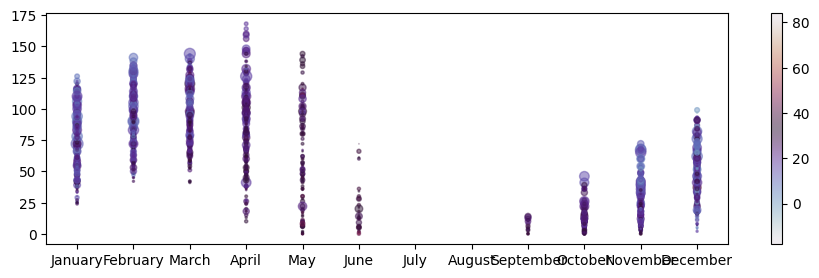

In [92]:
fig, ax = plt.subplots(figsize=(11,3))
s = ax.scatter(alta.DATE.dt.month_name(), alta.SNWD, c=alta.TOBS,
           s=alta.SNOW**1.2,
           marker='o', 
           alpha=.5,
           cmap='twilight')
# add legend
_ = plt.colorbar(s)

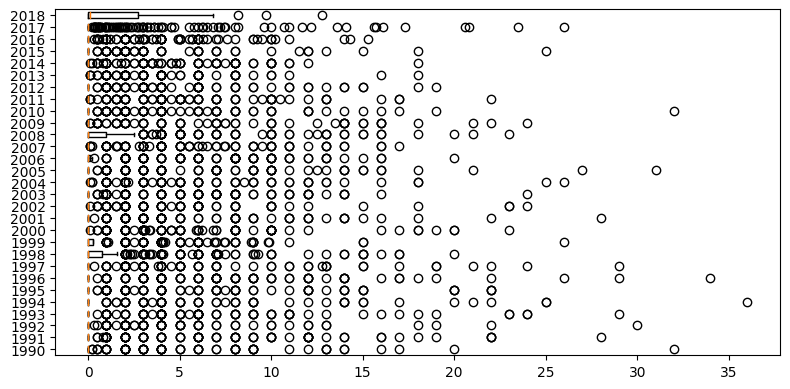

In [93]:
# boxplot
fig, ax = plt.subplots(figsize=(8,4))
data = [(name, list(g.SNOW.fillna(0))) 
        for name, g in alta.groupby(alta.DATE.dt.year)]
year_data = [x[1] for x in data]
years = [x[0] for x in data]
_ = ax.boxplot(year_data,
              labels=years, vert=False
              )
plt.tight_layout()

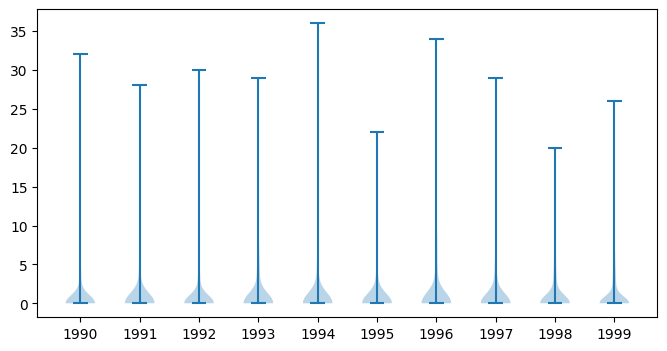

In [94]:
# violin plot
fig, ax = plt.subplots(figsize=(8,4))
data = [(name, list(g.SNOW.fillna(0))) 
        for name, g in alta.groupby(alta.DATE.dt.year)]
year_data = [x[1] for x in data]
years = [x[0] for x in data]
size = 10
ax.violinplot(year_data[:size])
# No labels parameter for violinplot...
ax.set_xticks(range(1, size + 1))  # tell labels to start at 1 instead of 0
_ = ax.set_xticklabels(years[:size])

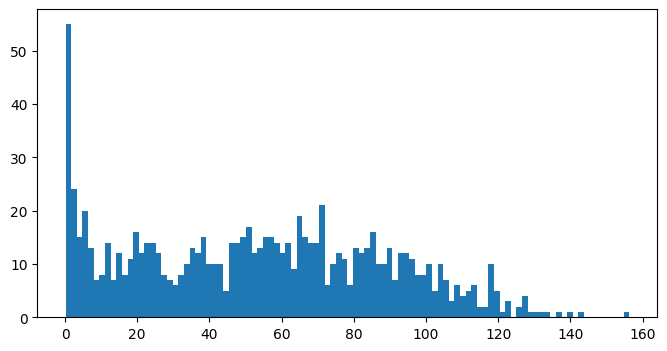

In [95]:
# Histogram - careful of values that you feed it
# (NaN's will cause it to fail with older matplotlibs)
fig, ax = plt.subplots(figsize=(8,4))
_ = ax.hist(y.values[y.values>0], bins=100)

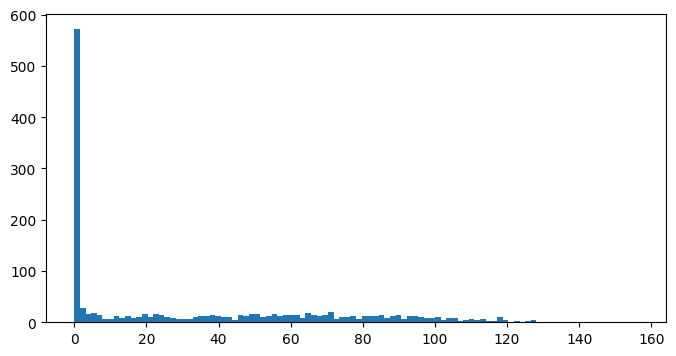

In [96]:
# Histogram - change bins
fig, ax = plt.subplots(figsize=(8,4))
_ = ax.hist(y.dropna(), bins=100)

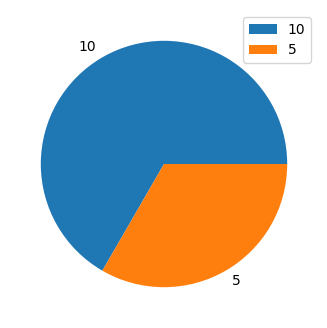

In [97]:
# Pie
fig, ax = plt.subplots(figsize=(8,4))
_=ax.pie([10, 5], labels=['10', '5'])
ax.legend()

## Exercise: Plot Types

*  Plot a line plot of the ``nyc_weekly`` data
*  Plot a bar plot of the ``nyc_weekly`` data
* Plot a scatter plot of the ``nyc_weekly`` data
* Plot a histogram of the ``nyc_weekly`` data
* Plot a pie chart of the ``nyc_weekly`` data

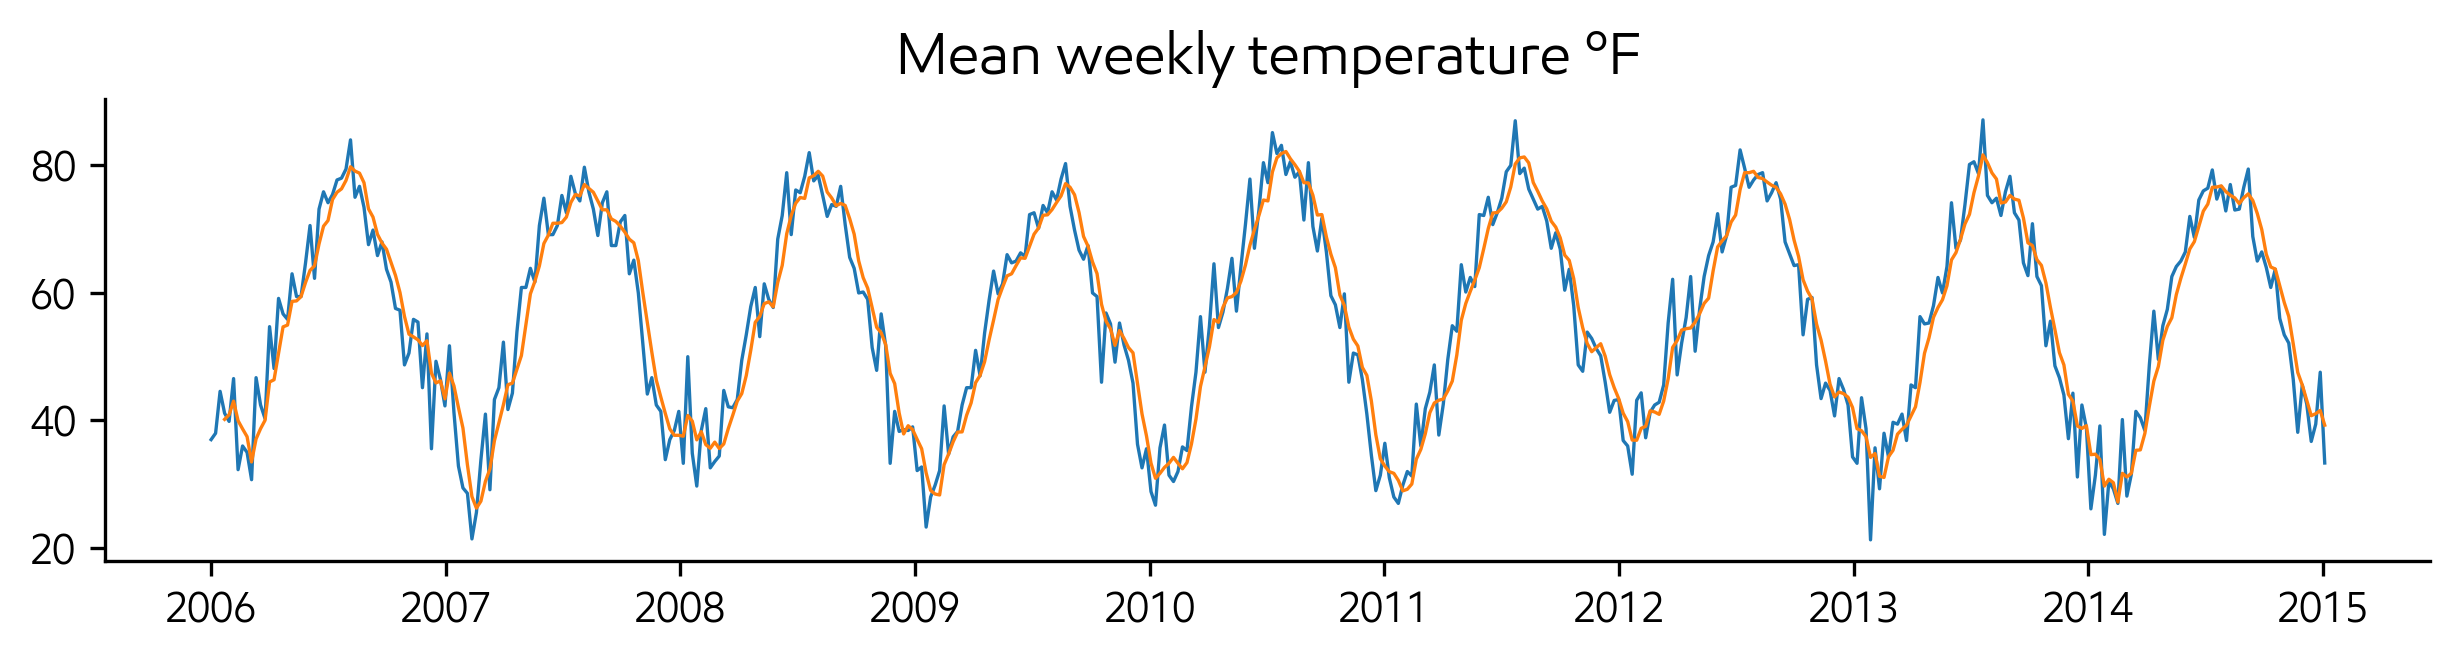

In [98]:
with plt.style.context('xom'):
    fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,2), dpi=300)
    ax.plot(nyc_weekly)
    ax.plot(nyc_weekly.rolling(4).mean())
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)

    _ = ax.set_title(f'Mean weekly temperature ºF')


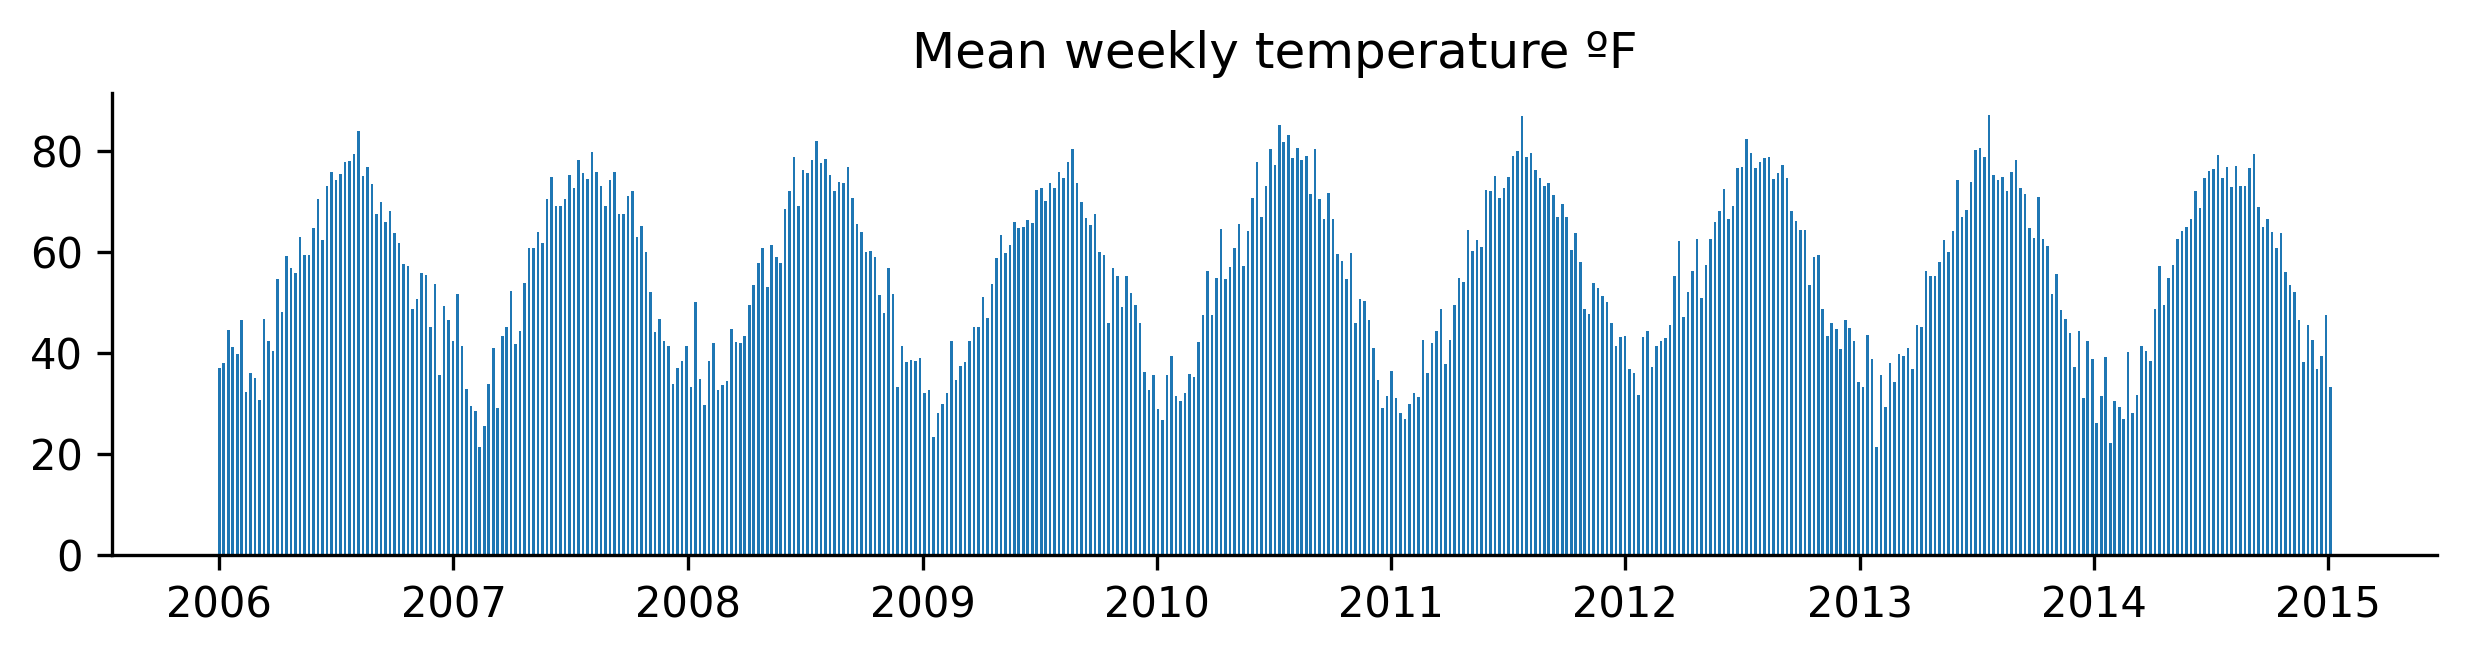

In [99]:
fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,2), dpi=300)
ax.bar(nyc_weekly.index, nyc_weekly, width=4)
# ax.bar(nyc_weekly.index, nyc_weekly.rolling(4).mean())
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)

_ = ax.set_title(f'Mean weekly temperature ºF')


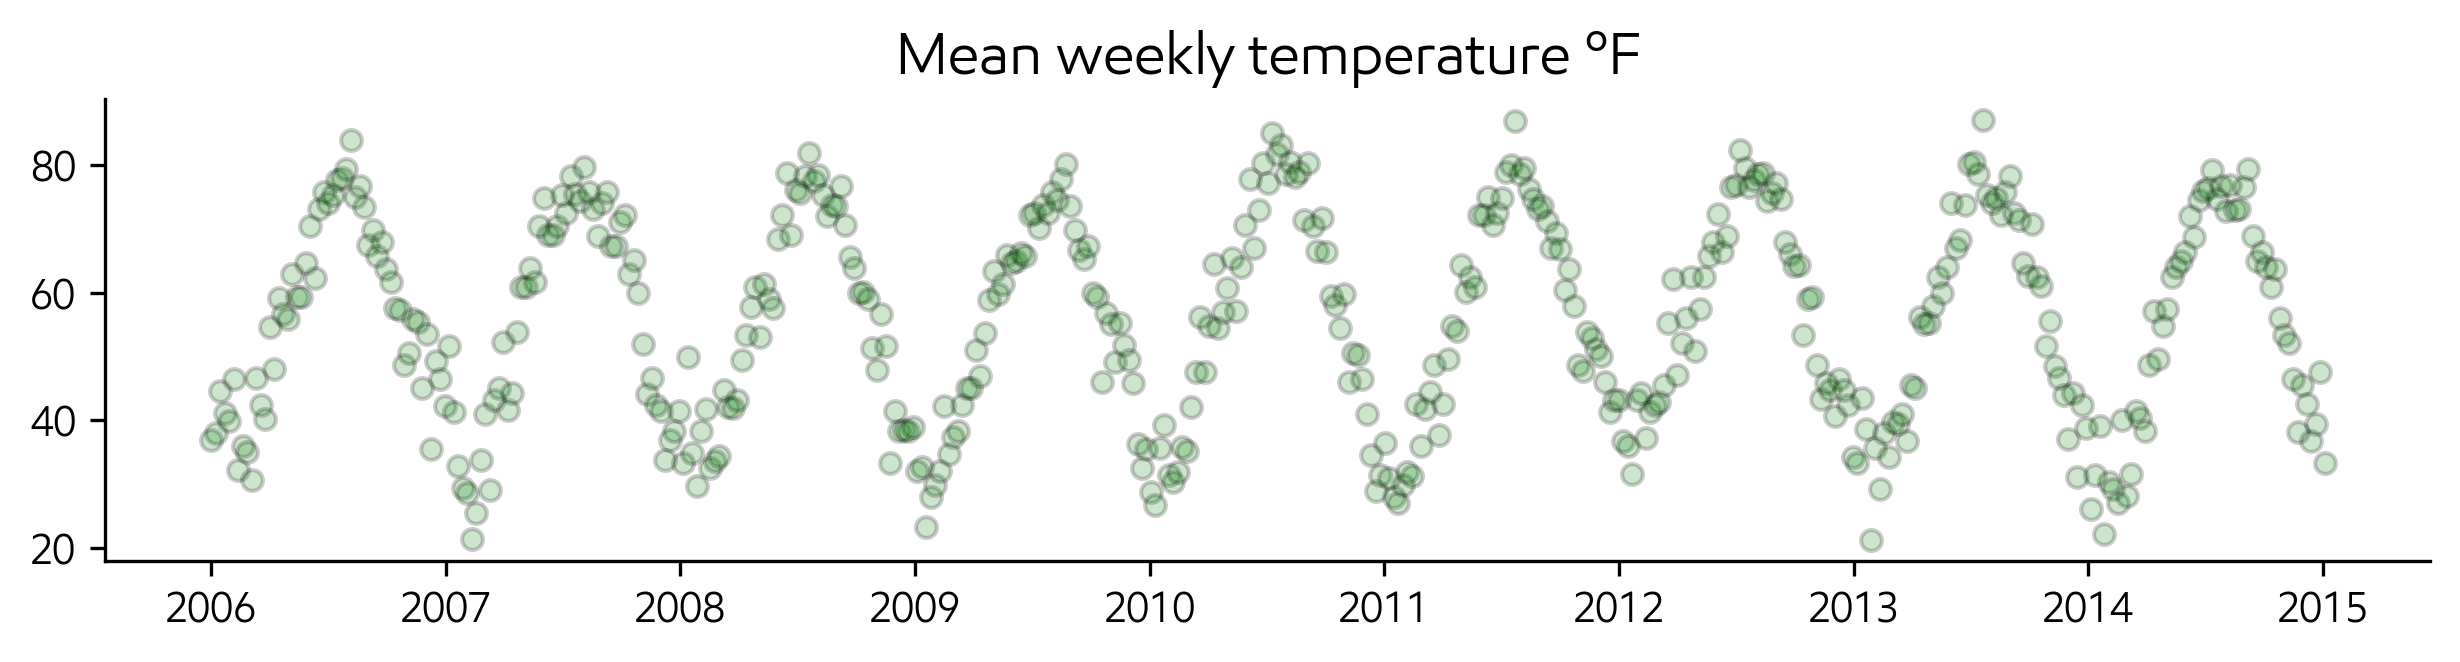

In [100]:
with plt.style.context('xom'):
    fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,2), dpi=300)
    ax.scatter(nyc_weekly.index, nyc_weekly, alpha=0.2, marker = 'o', color='green', edgecolor='k')
    # ax.bar(nyc_weekly.index, nyc_weekly.rolling(4).mean())
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)

    _ = ax.set_title(f'Mean weekly temperature ºF')

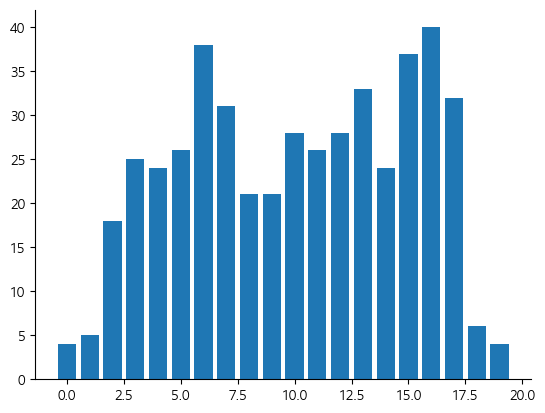

In [101]:
with plt.style.context('xom'):
    # simulate a histogram
    (pd.cut(nyc_weekly,20, labels=range(20))
     .value_counts()
     .sort_index()
     .pipe(lambda s: plt.bar(s.index, s))
    )
# plt.bar_label(ax=ax)

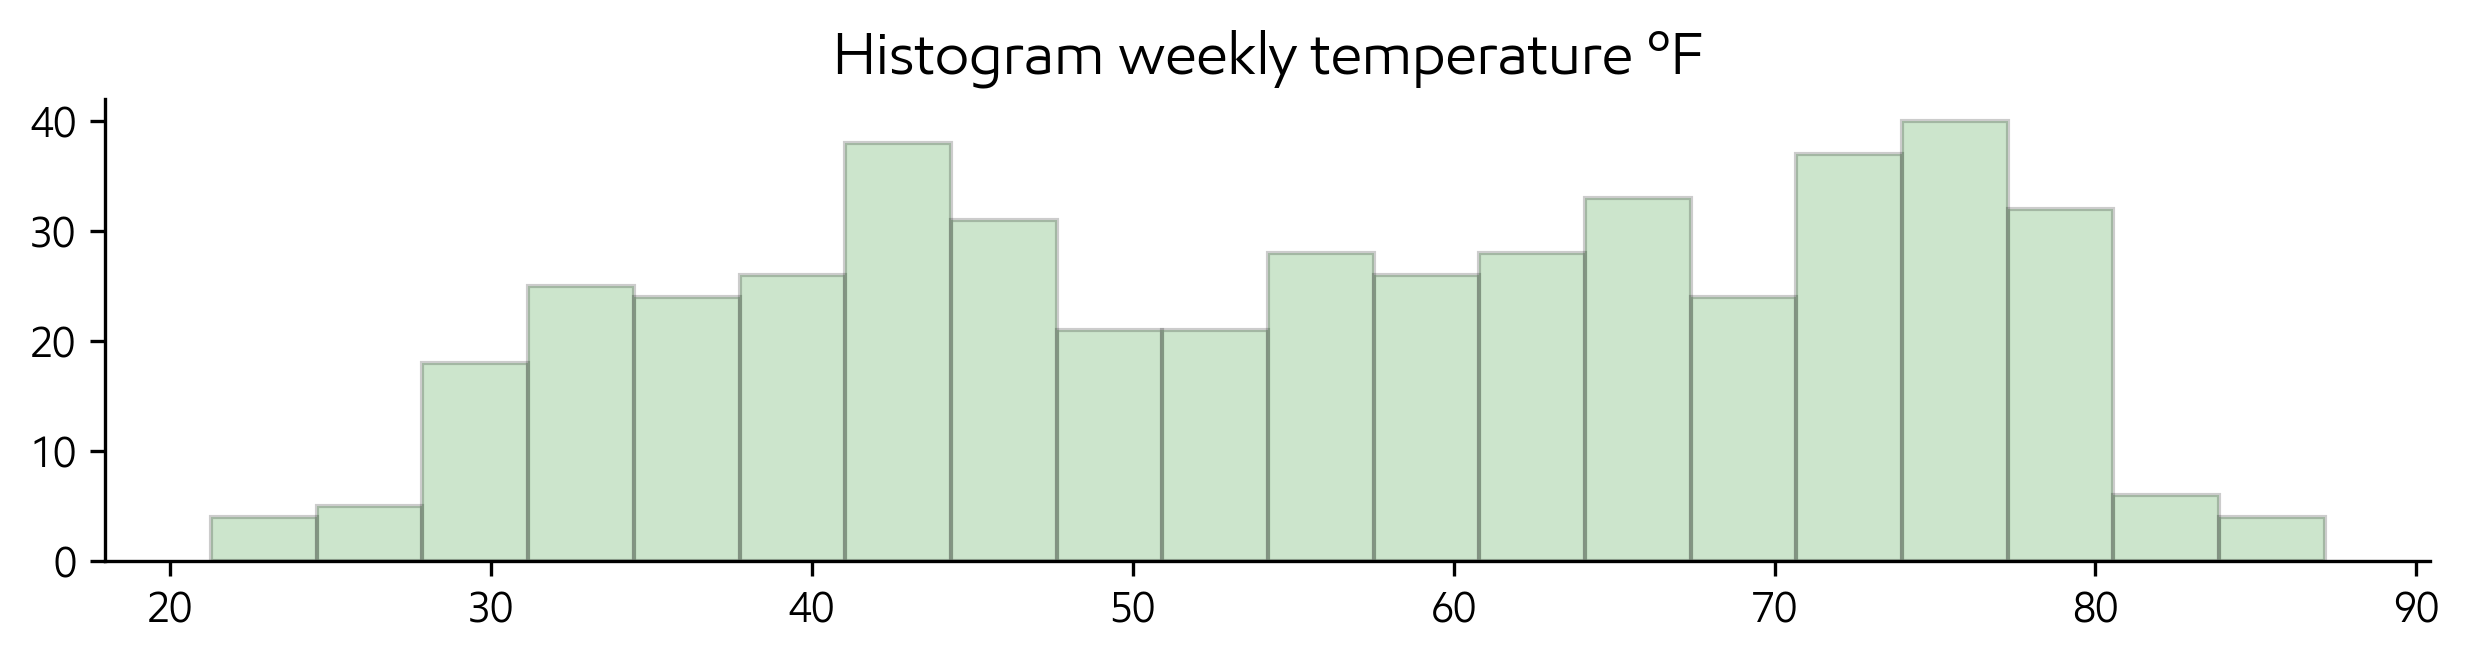

In [102]:
with plt.style.context('xom'):
    fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,2), dpi=300)
    ax.hist(nyc_weekly, alpha=0.2, color='green', edgecolor='k', bins=20)
    # ax.bar(nyc_weekly.index, nyc_weekly.rolling(4).mean())
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)

    _ = ax.set_title(f'Histogram weekly temperature ºF')

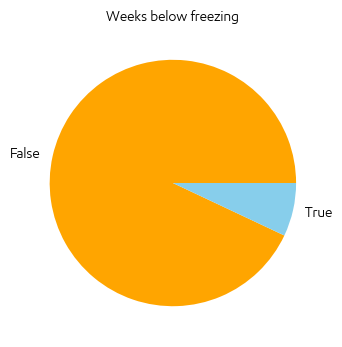

In [103]:
with plt.style.context('xom'):
    fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(4,4), dpi=100)
    ax.pie((nyc_weekly<32).value_counts(),labels=(nyc_weekly<32).value_counts().index, colors=['orange','skyblue'])
    # ax.bar(nyc_weekly.index, nyc_weekly.rolling(4).mean())

    _ = ax.set_title(f'Weeks below freezing', fontsize=10)

## Architecture

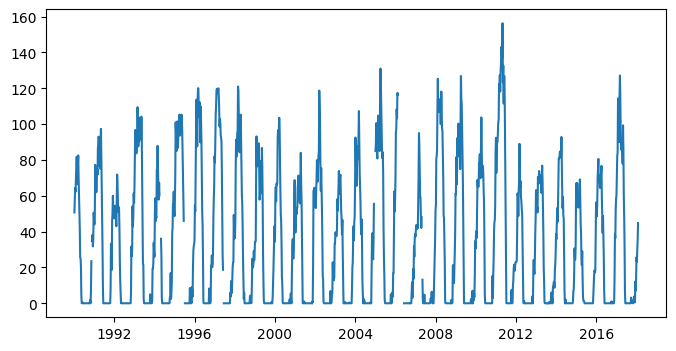

In [104]:
# Notice what ax.plot returns
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y)

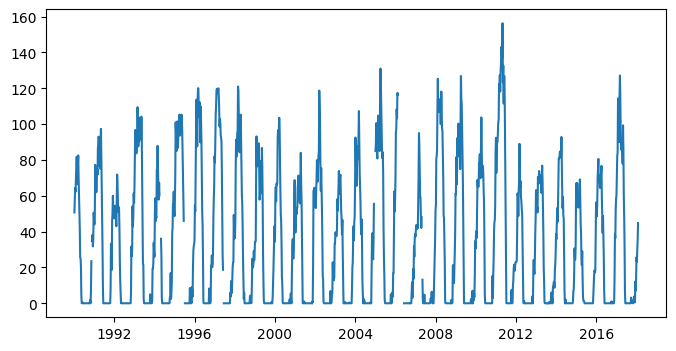

In [105]:
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)

In [106]:
print(dir(res[0]))

['_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alias_map', '_alpha', '_animated', '_antialiased', '_axes', '_callbacks', '_clipon', '_clippath', '_cm_set', '_color', '_dash_pattern', '_dashcapstyle', '_dashjoinstyle', '_default_contains', '_drawStyles_l', '_drawStyles_s', '_drawstyle', '_fully_clipped_to_axes', '_gapcolor', '_get_markerfacecolor', '_get_transformed_path', '_gid', '_in_layout', '_internal_update', '_invalidx', '_invalidy', '_is_sorted', '_label', '_lineStyles', '_linestyle', '_linestyles', '_linewidth', '_marker', '_markeredgecolor', '_markeredgewidth', '_markerfacecolor', '_markerfacecoloralt', '_markersize', '_

In [107]:
help(res[0])

Help on Line2D in module matplotlib.lines object:

class Line2D(matplotlib.artist.Artist)
 |  Line2D(xdata, ydata, *, linewidth=None, linestyle=None, color=None, gapcolor=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
 |  
 |  A line - the line can have both a solid linestyle connecting all
 |  the vertices, and a marker at each vertex.  Additionally, the
 |  drawing of the solid line is influenced by the drawstyle, e.g., one
 |  can create "stepped" lines in various styles.
 |  
 |  Method resolution order:
 |      Line2D
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xdata, ydata, *, linewidth=None, linestyle=None, color=None, gapcolor=None, marker=None, markersize=Non

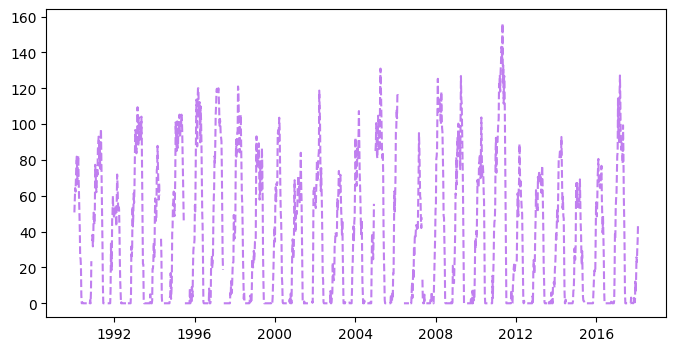

In [108]:
# Change color and line style
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')

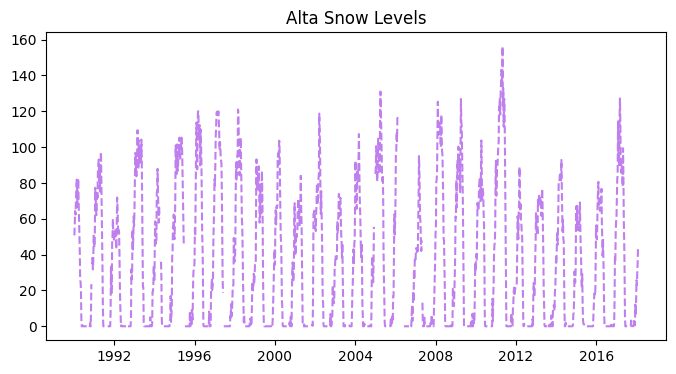

In [109]:
# Set the title
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Alta Snow Levels')

In [110]:
title

Text(0.5, 1.0, 'Alta Snow Levels')

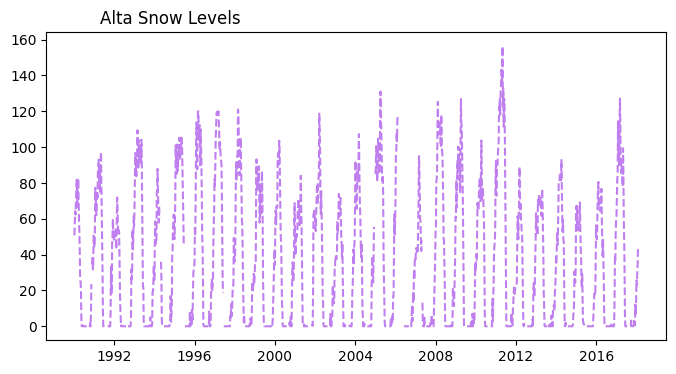

In [111]:
# Tweak title position
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Alta Snow Levels')
title.set_position((.2,.7))

In [112]:
# let's look at the ax
print(dir(ax))

['ArtistList', '_AxesBase__clear', '_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alias_map', '_alpha', '_anchor', '_animated', '_aspect', '_autotitlepos', '_axes', '_axes_class', '_axes_locator', '_axis_map', '_axis_names', '_axisbelow', '_box_aspect', '_callbacks', '_check_no_units', '_children', '_clipon', '_clippath', '_cm_set', '_colorbars', '_convert_dx', '_current_image', '_default_contains', '_deprecate_noninstance', '_errorevery_to_mask', '_facecolor', '_fill_between_x_or_y', '_frameon', '_fully_clipped_to_axes', '_gci', '_gen_axes_patch', '_gen_axes_spines', '_get_aspect_ratio

In [113]:
yax = ax.get_yaxis()

In [114]:
for member in dir(yax):
    if member.startswith('get'):
        try:
            print(f'{member:20}: {getattr(yax, member)()}')
        except TypeError:
            print(f'**ERR with {member}')
yax.get_scale()

get_agg_filter      : None
get_alpha           : None
get_animated        : False
get_children        : [Text(4.444444444444445, 0.5, ''), Text(0, 345.8888888888889, ''), <matplotlib.axis.YTick object at 0x000002D7A7A6E880>, <matplotlib.axis.YTick object at 0x000002D7A7A6E220>, <matplotlib.axis.YTick object at 0x000002D7A7A64DF0>, <matplotlib.axis.YTick object at 0x000002D7A7A64430>, <matplotlib.axis.YTick object at 0x000002D7A7A64B50>, <matplotlib.axis.YTick object at 0x000002D7AD246910>, <matplotlib.axis.YTick object at 0x000002D7A7A64670>, <matplotlib.axis.YTick object at 0x000002D7AD2469D0>, <matplotlib.axis.YTick object at 0x000002D7AE82B880>, <matplotlib.axis.YTick object at 0x000002D7AE82B0A0>, <matplotlib.axis.YTick object at 0x000002D7AE842880>]
get_clip_box        : TransformedBbox(
    Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
    CompositeGenericTransform(
        CompositeGenericTransform(
            BboxTransformTo(
                Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)),
    

C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\1606421503.py:4: MatplotlibDeprecationWarning: The get_text_widths function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  print(f'{member:20}: {getattr(yax, member)()}')
C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\1606421503.py:4: MatplotlibDeprecationWarning: The get_ticklabel_extents function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  print(f'{member:20}: {getattr(yax, member)()}')


'linear'

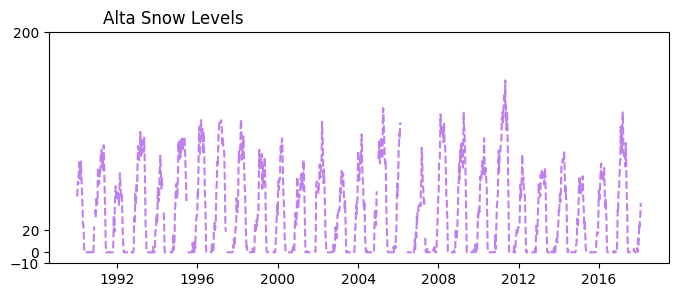

In [115]:
# Customize tick locations
fig, ax = plt.subplots(figsize=(8,3))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Alta Snow Levels')
title.set_position((.2,.7))

yax = ax.get_yaxis()
_ = yax.set_ticks([-10, 0, 20, 200])

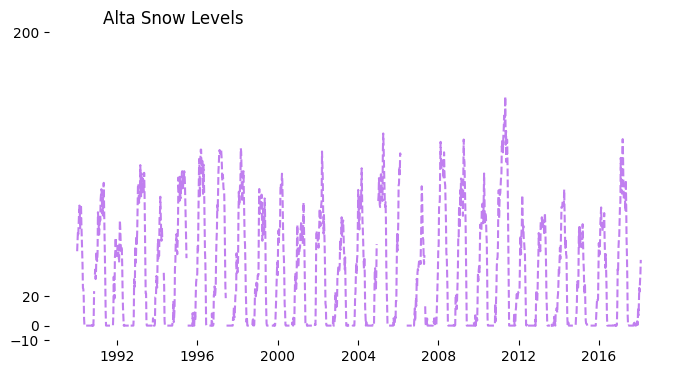

In [116]:
# Remove spines

fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Alta Snow Levels')
title.set_position((.2,.7))

yax = ax.get_yaxis()
yax.set_ticks([-10, 0, 20, 200])

import matplotlib
for c in ax.get_children():
    if isinstance(c, matplotlib.spines.Spine):
        c.set_visible(False)

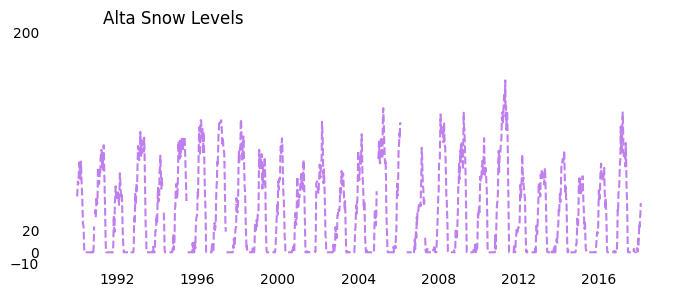

In [117]:
# Remove ticks

fig, ax = plt.subplots(figsize=(8,3))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Alta Snow Levels')
title.set_position((.2,.7))

yax = ax.get_yaxis()
yax.set_ticks([-10, 0, 20, 200])

import matplotlib
for c in ax.get_children():
    if isinstance(c, matplotlib.spines.Spine):
        c.set_visible(False)
        
ax.tick_params(bottom=False, left=False)

In [118]:
# Jupyter hint
ax.tick_params??

## Exercise: Architecture

Using the ``nyc_weekly`` data set, create a line plot, then
* Bump up the figure size to ``(8,4)``
* Set the yticks to ``[0, 32, 80, 100]``
* Add a title in the middle of the plot ``Central Park Temp``
* Remove top and right spine

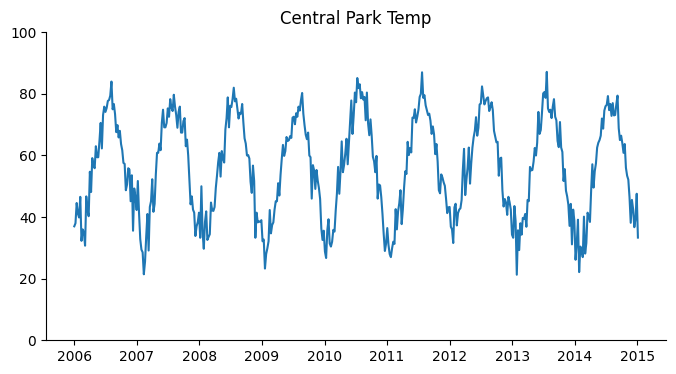

In [119]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(nyc_weekly)
ax.set_yticks(range(0,120,20))
ax.set_title('Central Park Temp')
# ax.set_yscale('log')
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)

## Annotating Charts

Text(6898.6, 120, 'Snow Levels')

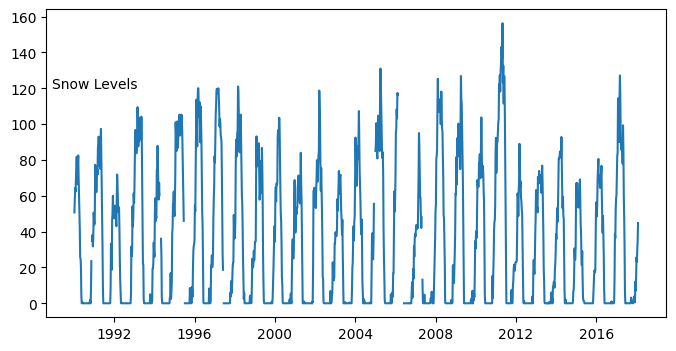

In [120]:
# Add text to chart in data coordinates
# Note Jupyter version might fail without ``clip_on=True``)
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)
ax.text(ax.get_xlim()[0]+100, 120, 'Snow Levels', clip_on=True)

Text(6898.6, 140, 'Box')

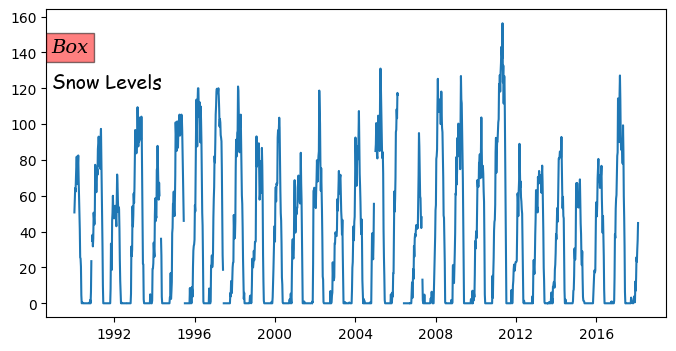

In [121]:
# Tweak text properties
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)
# Need TTF/OTF fonts (TTC currently fail)
ax.text(ax.get_xlim()[0]+100, 120, 'Snow Levels', clip_on=True,
       family='Comic Sans MS', size=14)
# bbox is a mpl.patches.Rectangle
ax.text(ax.get_xlim()[0]+100, 140, 'Box', clip_on=True,
       family='Serif', size=14, style='italic', bbox={'facecolor': 'red', 'alpha': .5})

Text(0.2, 0.9, 'Box')

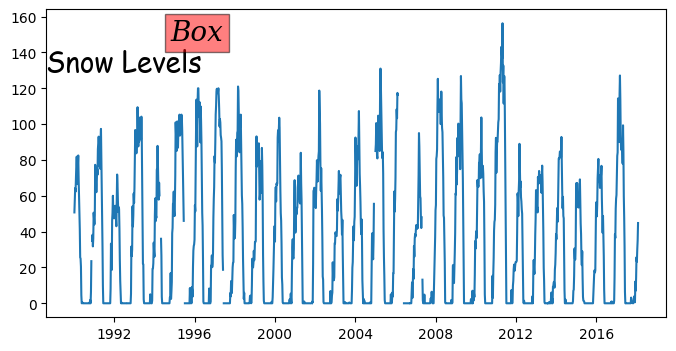

In [122]:
# Add text to chart USING 0-1 coordinates
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)
# Need TTF/OTF fonts (TTC currently fail)
ax.text(0, .8, 'Snow Levels', clip_on=True,
       family='Comic Sans MS', size=20,
       transform=ax.transAxes) # transaxis annotation for percent basis
# bbox is a mpl.patches.Rectangle
ax.text(.2, .9, 'Box', clip_on=True,
       family='Serif', size=20, style='italic', 
        bbox={'facecolor': 'red', 'alpha': .5},
       transform=ax.transAxes)

C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\3664718659.py:13: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  xytext=(y.idxmax()+y.idxmax().freq*100, y.max() - 20),


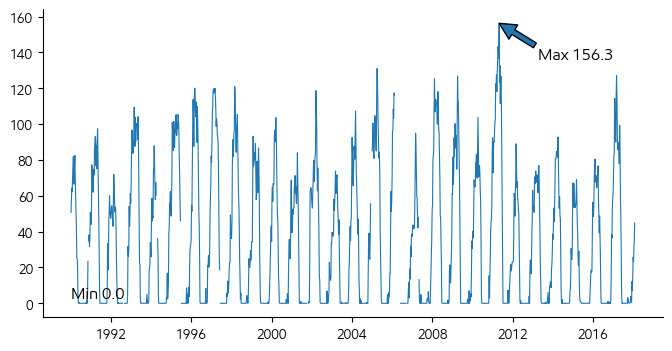

In [123]:
with plt.style.context('xom'):
    # Add text to chart in data coordinates
    fig, ax = plt.subplots(figsize=(8,4))
    res = ax.plot(x, y)

    ax.annotate(f'Min {y.min()}', xy=(x.min(), y.min()), 
                xytext=(x.min(), y.min() + 3))

    # arrowprops is a mpl.patches.FancyArrowPatch
    _ = ax.annotate(f'Max {y.max():.1f}', xy=(y.idxmax(), y.max()), 
                    #xytext=(y.idxmax()+150, y.max() - 20),
                    # pandas 1.0 compat
                    xytext=(y.idxmax()+y.idxmax().freq*100, y.max() - 20),
                    arrowprops={})# arrow props with empty dict automatically links text and point

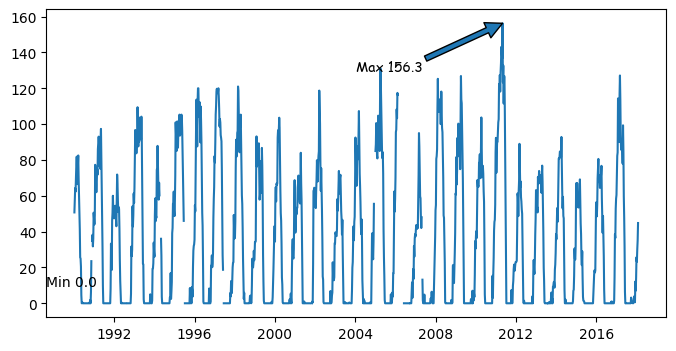

In [124]:
# Add text to chart USING 0-1 coordinates
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)

ax.annotate(f'Min {y.min()}',xy=(0, 0), 
            xytext=(0, .1),
            xycoords='axes fraction', 
            textcoords='axes fraction')
# arrowprops is a mpl.patches.FancyArrowPatch
_ = ax.annotate(f'Max {y.max():.1f}', xy=(y.idxmax(), y.max()), 
                xytext=(.5, .8),
                textcoords='axes fraction',
                family='comic sans ms',
                arrowprops={})

# mixing percent and data use for annotation

## Exercise: Annotation
Using the last 20 rows of ``nyc_weekly`` make a new dataset ``c3``. Plot a bar plot. Remove the y axis. Label each bar with its value right above (or inside of the top of) the bar. (See https://matplotlib.org/users/text_props.html page for help with rotation or vertical or horizontal alignment) (Might need to tweak ``width`` parameter of call to ``ax.bar``)

In [125]:
c3 = nyc_weekly.iloc[-30:]
c3

EST
2014-06-15    68.714286
2014-06-22    74.571429
2014-06-29    76.000000
2014-07-06    76.428571
2014-07-13    79.285714
2014-07-20    74.714286
2014-07-27    76.714286
2014-08-03    72.857143
2014-08-10    77.000000
2014-08-17    73.000000
2014-08-24    73.142857
2014-08-31    76.571429
2014-09-07    79.428571
2014-09-14    68.857143
2014-09-21    65.000000
2014-09-28    66.428571
2014-10-05    64.000000
2014-10-12    60.857143
2014-10-19    63.714286
2014-10-26    56.000000
2014-11-02    53.428571
2014-11-09    52.142857
2014-11-16    46.428571
2014-11-23    38.142857
2014-11-30    45.571429
2014-12-07    42.571429
2014-12-14    36.714286
2014-12-21    39.428571
2014-12-28    47.571429
2015-01-04    33.333333
Freq: W-SUN, Name: temp, dtype: float64

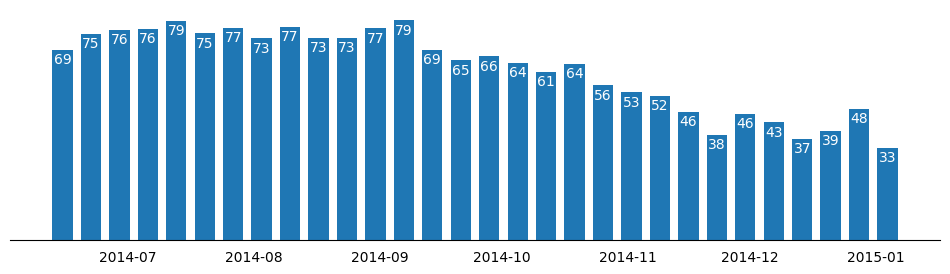

In [126]:
fig, ax = plt.subplots(figsize = (12,3))
p1 = ax.bar(c3.index,c3, width = 5)

# for pos, value, in c3.iteritems():
#     ax.text(pos, value - 5, f'{value:.0f}', ha='center', color='white')

ax.tick_params(bottom=False, left=False, labelleft=False)
for side in ['top', 'left', 'right']:
    ax.spines[side].set_visible(False)
    
_ = ax.bar_label(p1, fmt='%.0f', padding=-12, color='white')

## Configuring Matplotlib

C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\491808352.py:1: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring this parameter.
  plt.style.use(plt.rcParamsDefault)
C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\491808352.py:1: UserWarning: Style includes a parameter, 'backend_fallback', that is not related to style.  Ignoring this parameter.
  plt.style.use(plt.rcParamsDefault)
C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\491808352.py:1: UserWarning: Style includes a parameter, 'date.epoch', that is not related to style.  Ignoring this parameter.
  plt.style.use(plt.rcParamsDefault)
C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\491808352.py:1: UserWarning: Style includes a parameter, 'docstring.hardcopy', that is not related to style.  Ignoring this parameter.
  plt.style.use(plt.rcParamsDefault)
C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_12948\491808352.py:1: UserWarning: Style includes a parameter, 'figure.max_open

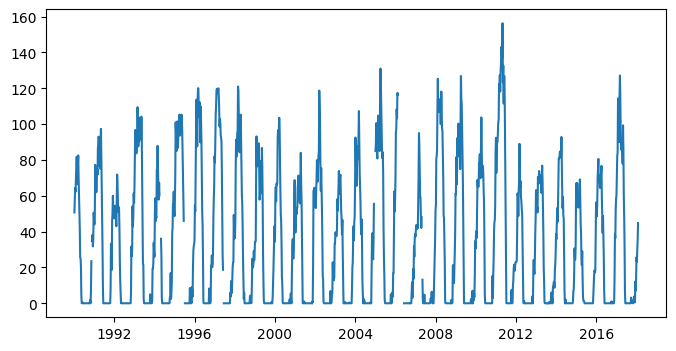

In [127]:
plt.style.use(plt.rcParamsDefault)
fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)

In [128]:
# Default style is stored here
print(plt.rcParamsDefault)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

In [129]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'big', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10', 'xom']


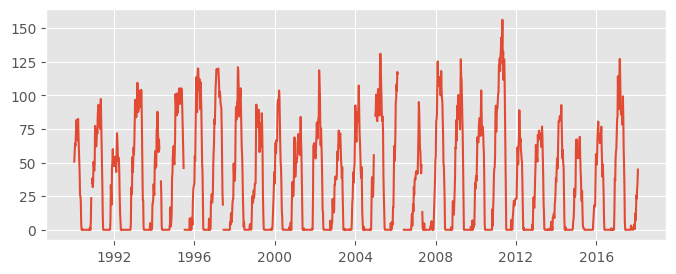

In [130]:
# note that changing the style leaves it changed
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,3))
res = ax.plot(x, y)

### Cool way to temporary set
Check the with application

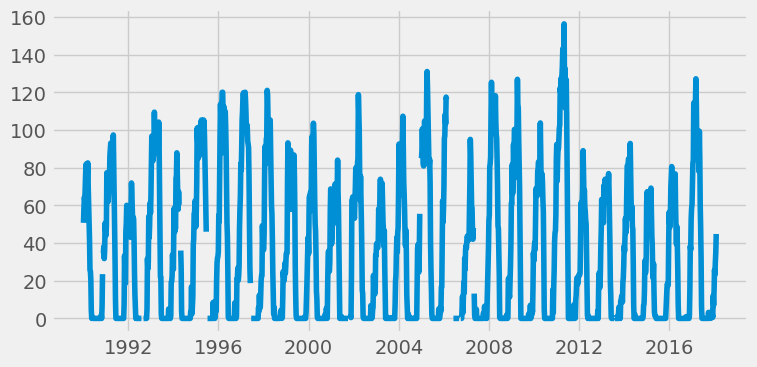

In [131]:
# use a context manager for temporary changes
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(8,4))
    res = ax.plot(x, y)

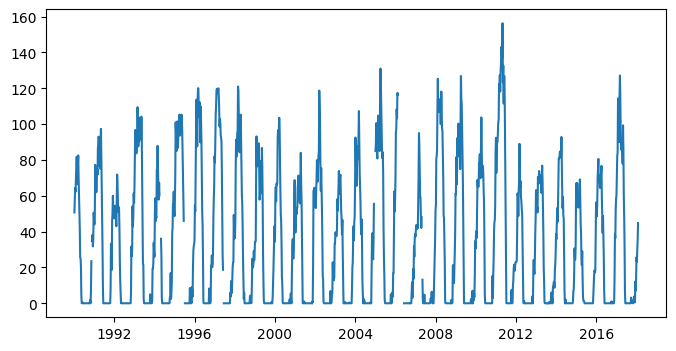

In [132]:
# go back to defaults
matplotlib.rcdefaults()

fig, ax = plt.subplots(figsize=(8,4))
res = ax.plot(x, y)

## Find Config directory
This is importabt if you want to edit the config file

In [133]:
# can create a configuration file in $MPLCONFIGDIR environment variable
# MPLCONFIGDIR/
#      matplotlibrc - default styles
#      stylelib/CUSTOM.mlpstyle - can use matplotlib.style.use('CUSTOM') 
#             (Might need to plt.style.reload_library() )
matplotlib.get_configdir()

'C:\\Users\\KNHOFFM\\.matplotlib'

### Save this 
Creating a style library from python and updating for application

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


C:\Users\KNHOFFM\.matplotlib\stylelib\big.mplstyle


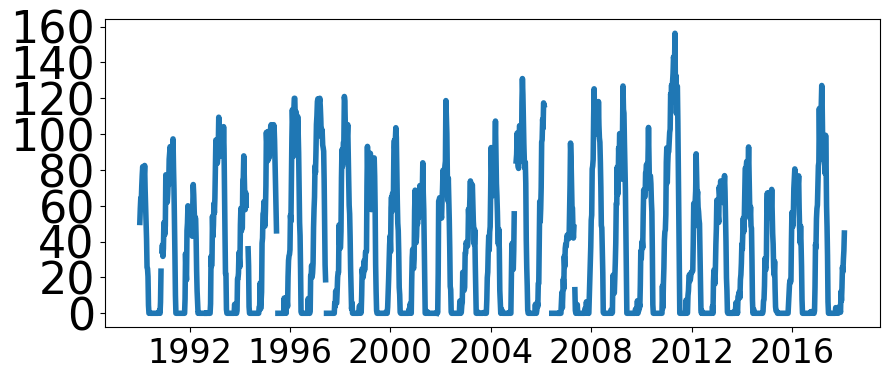

In [134]:
# style loading done at import time. need to reload
import importlib, os
folder = os.path.join(matplotlib.get_configdir(), 'stylelib')
if not os.path.exists(folder):
    os.mkdir(folder)
cfg_name = os.path.join(folder, 'big.mplstyle')
with open(cfg_name, 'w') as fout:
    fout.write("""
axes.labelsize : 36
lines.linewidth : 4
xtick.labelsize : 24
ytick.labelsize : 32
    """)
print(cfg_name)
plt.style.reload_library()
with plt.style.context('big'):
    fig, ax = plt.subplots(figsize=(10,4))
    # these fail in Jupyter currently (Sep 2018 - https://github.com/jupyter/notebook/issues/3385)
    matplotlib.rcParams['grid.color'] = 'r'
    matplotlib.rcParams['grid.linestyle'] = ':'
    matplotlib.rc('grid', color='r', alpha=1, linestyle='-', linewidth=1)
    res = ax.plot(x, y)

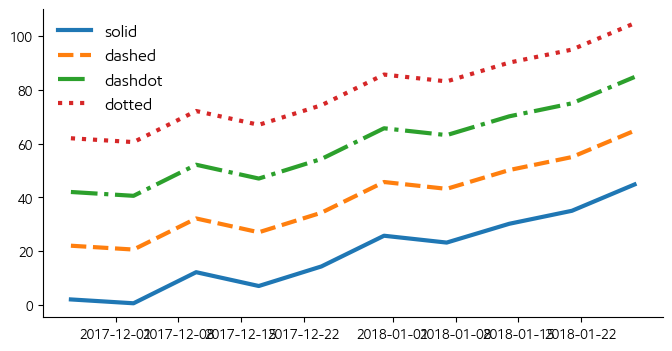

In [153]:
with plt.style.context('xom'):
    # linestyle - see help for ax.plot
    fig, ax = plt.subplots(figsize=(8,4))

    for i, (name, shortcut) in enumerate([('solid', '-',), ('dashed', '--'), 
        ('dashdot', '-.'), ('dotted', ':')]):
        ax.plot(y[-10:]+i*20, linestyle=shortcut, label=name, linewidth=3)
    ax.legend()

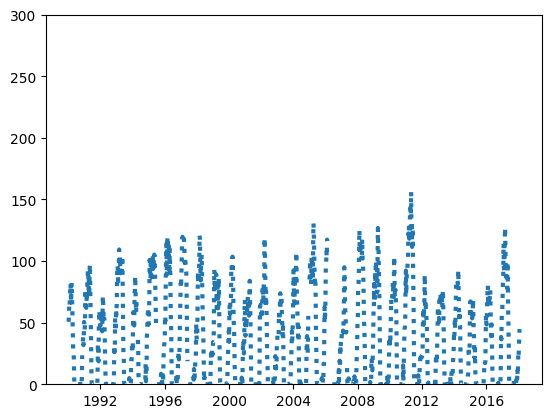

In [136]:
# Adjust axis limits
fig, ax = plt.subplots()
ax.set_ylim((0, 300))
ax.plot(y, linestyle=shortcut, label=name, linewidth=3)

Text(0, 0.5, 'Inches')

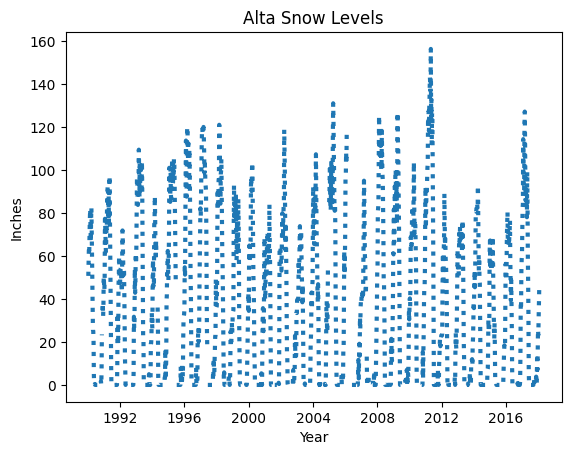

In [137]:
# Adjust Labels
# Can also set with ax.axis, which can also set x/y scale to same value with 'equal'.
fig, ax = plt.subplots()
#ax.axis('equal')
ax.plot(y, linestyle=shortcut, label=name, linewidth=3)
ax.set_title('Alta Snow Levels')
ax.set_xlabel('Year')
ax.set_ylabel('Inches')

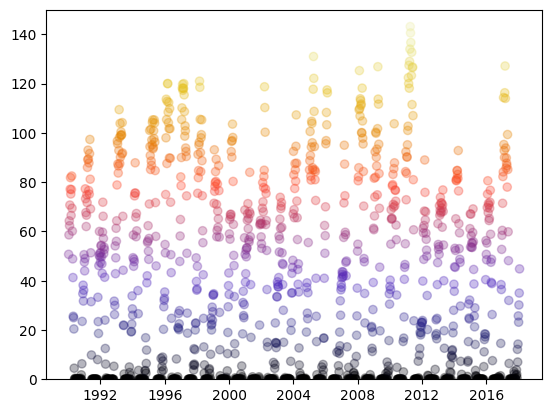

In [138]:
# colormaps (useful on scatter plots)
fig, ax = plt.subplots()
ax.set_ylim((0, 150))
ax.scatter(x, y, alpha=.3, c=y, cmap='CMRmap')

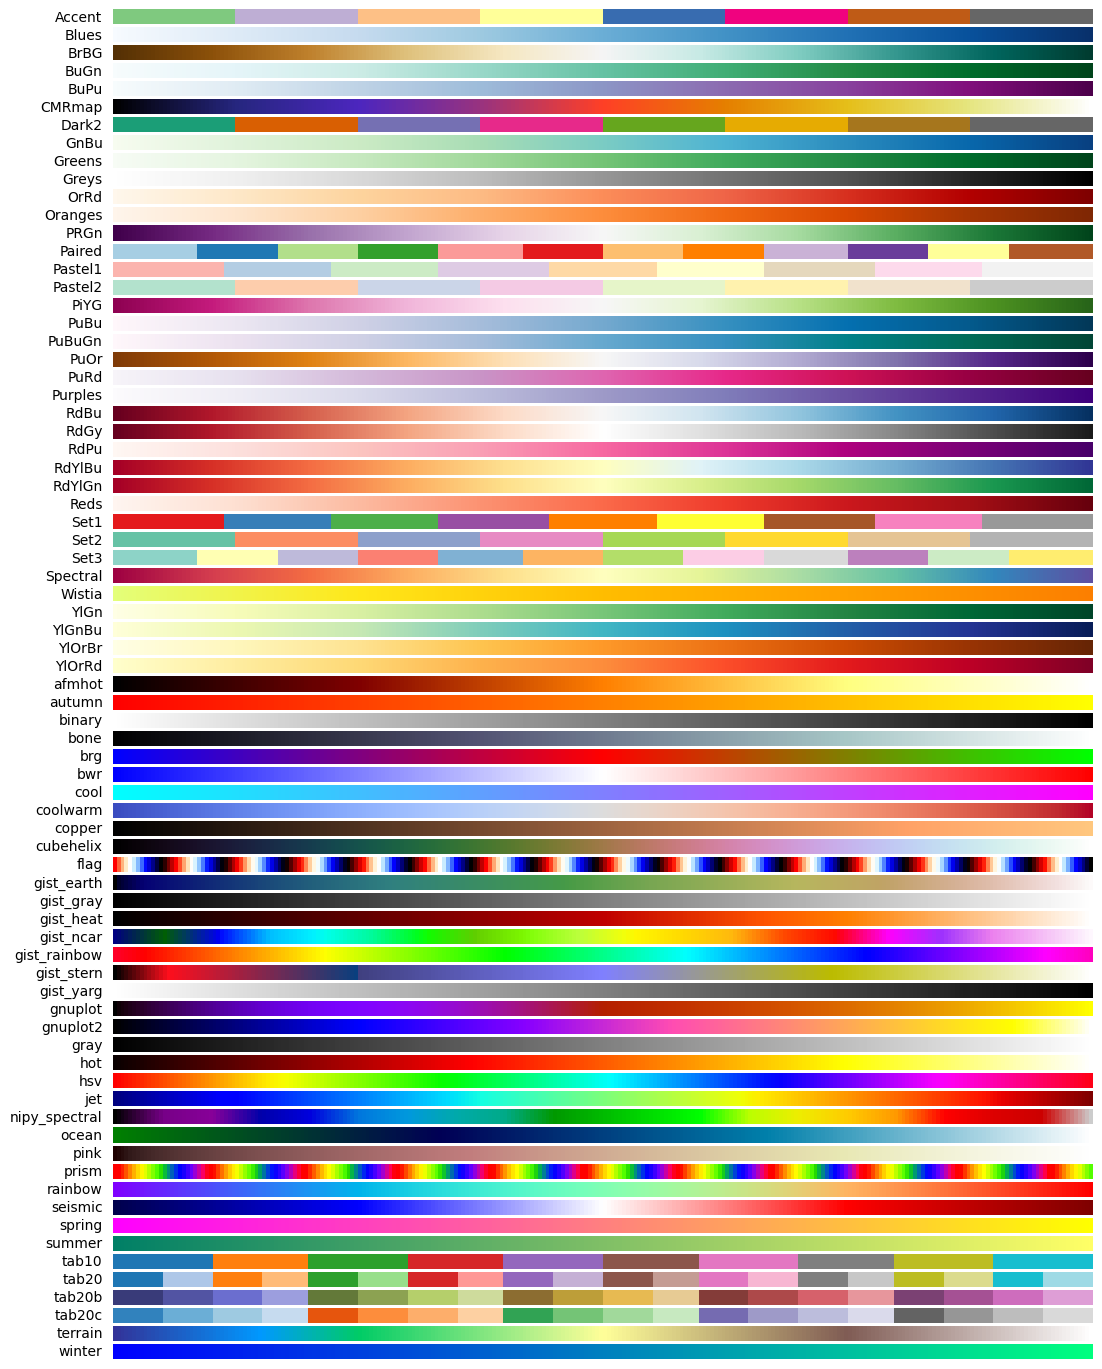

In [139]:
# see https://matplotlib.org/examples/color/colormaps_reference.html
import numpy as np
colormaps = [x for x in plt.cm.datad.keys() if not x.endswith('_r')]

fig, axes = plt.subplots(nrows=len(colormaps), figsize=(10,18))
plt.subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
for i, m in enumerate(sorted(colormaps)):
    ax = axes[i]
    ax.set_axis_off()
    ax.imshow(gradient,aspect='auto',
               cmap=m)
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    fig.text(x_text, y_text, m, va='center', ha='right', fontsize=10)


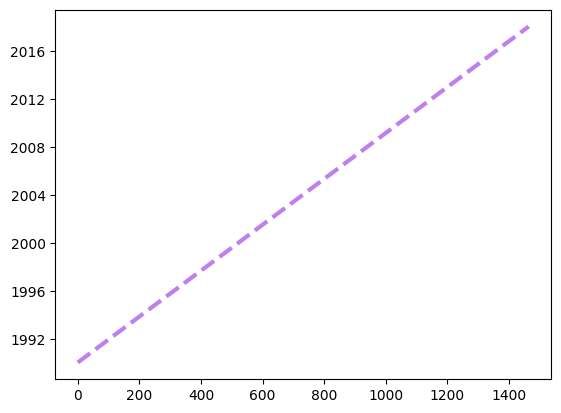

In [140]:
# Line Plot - Colors (can specify with HEX)
fig, ax = plt.subplots()
ax.plot(x, color='#C07FEF', linewidth=3, linestyle='--')

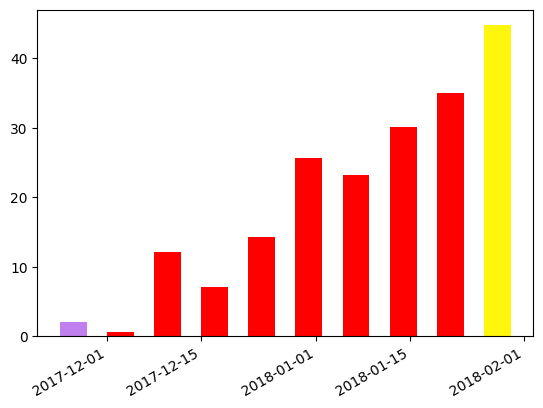

In [141]:
# Bar Plot color - pass in a single color or parallel sequence
last10 = y.iloc[-10:]
fig, ax = plt.subplots()
colors = ['red' for val in last10]
colors[0] = '#c07fef'
colors[-1] = '#fef70c'
ax.bar(last10.index, last10, color=colors, width=4)
fig.autofmt_xdate()  # tweak dates

## Exercise: Customize

* Create a line plot of ``nyc_weekly`` temporarily using the ``'dark_background'`` style, dotted lines, and a linewidth of 5
* Using the bar plot from the annotation exercise, color all the bars grey, except color the minimum value red and the maximum value green.

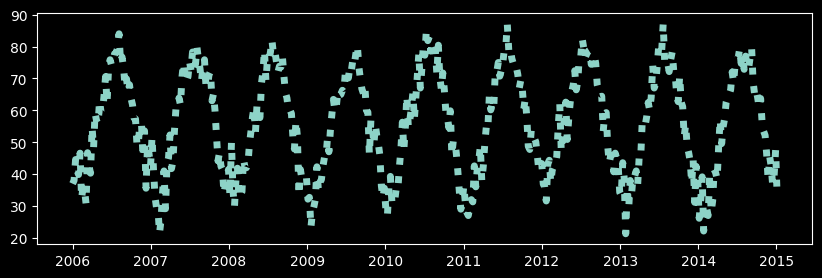

In [142]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(nyc_weekly, linestyle='dotted', linewidth=5)
    ax.grid(visible=False)

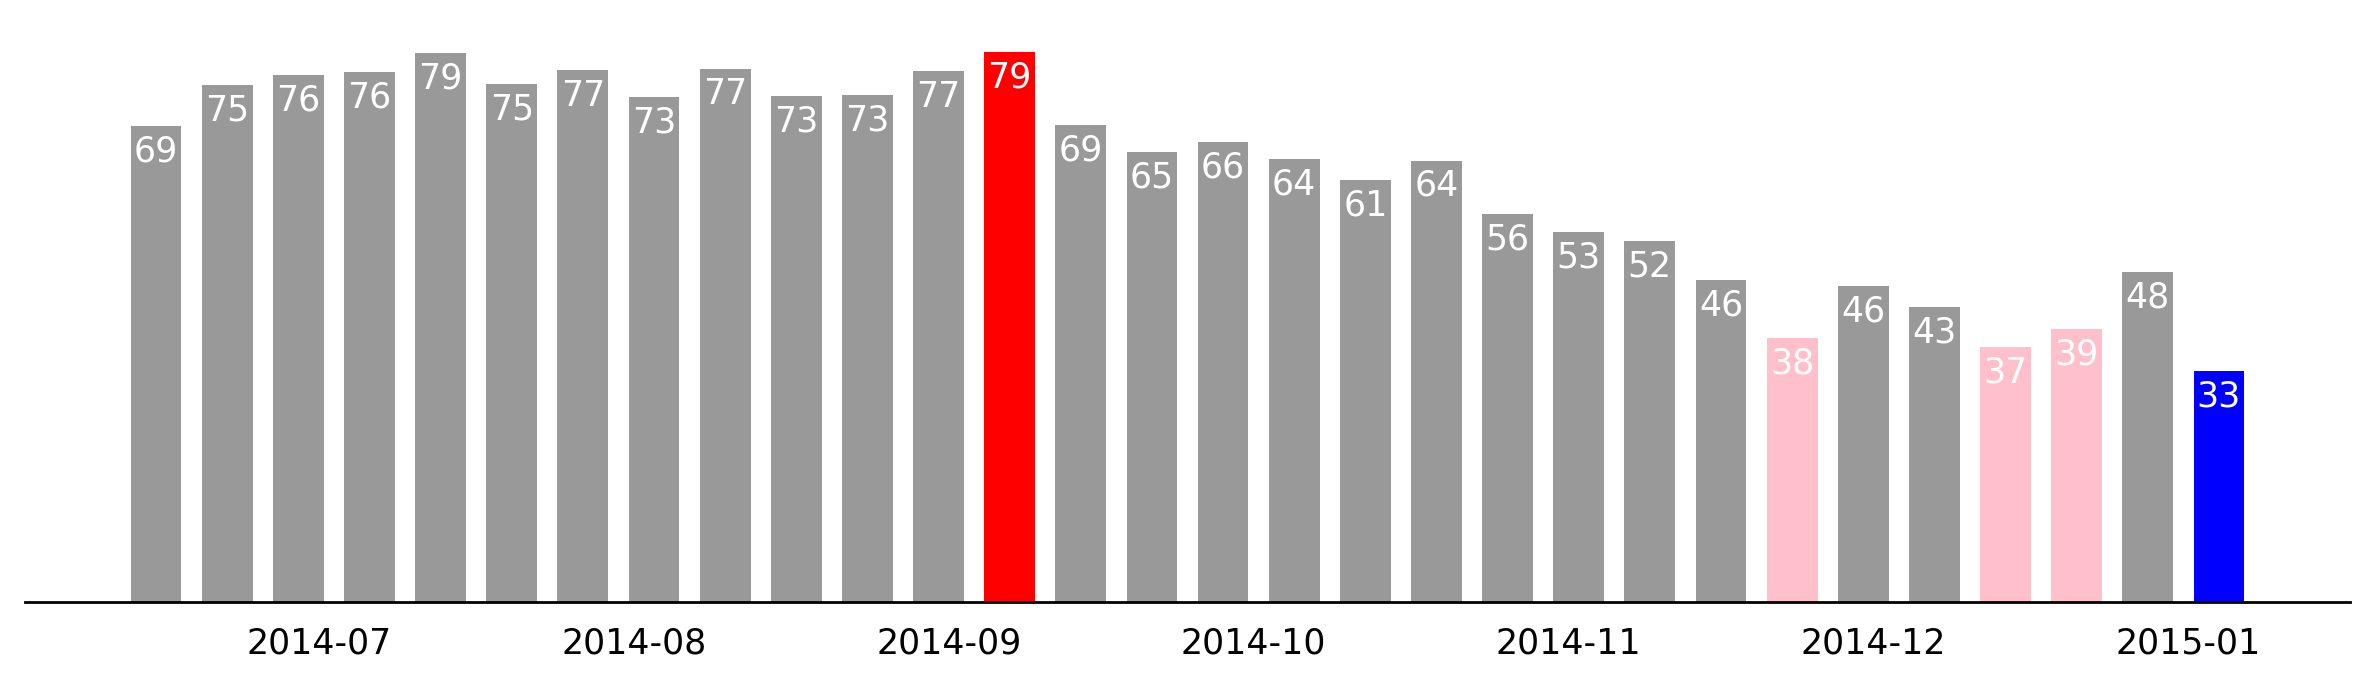

In [143]:
# go back to defaults
matplotlib.rcdefaults()

fig, ax = plt.subplots(figsize = (12,3), dpi=250)

# color fun
colors = ['#999999' if val >= 40 else 'pink' for val in c3 ] # list comprehension
colors[c3.index.get_loc(c3.idxmin())] = 'b'
colors[c3.index.get_loc(c3.idxmax())] = 'r'

# could use a column assigned hex or color code in python to assign color as well
# c3.assign(colors = lambda )

p1 = ax.bar(c3.index,c3, width = 5, color=colors)

# for pos, value, in c3.iteritems():
#     ax.text(pos, value - 5, f'{value:.0f}', ha='center', color='white')

ax.tick_params(bottom=False, left=False, labelleft=False)
for side in ['top', 'left', 'right']:
    ax.spines[side].set_visible(False)
    
_ = ax.bar_label(p1, fmt='%.0f', padding=-12, color='white')

## 3D and other Tools

In [144]:
pd.to_numeric(alta.DATE) #.astype(int)

0         631152000000000000
1         631238400000000000
2         631324800000000000
3         631411200000000000
4         631497600000000000
                ...         
10020    1516579200000000000
10021    1516665600000000000
10022    1516752000000000000
10023    1516838400000000000
10024    1516924800000000000
Name: DATE, Length: 10025, dtype: int64

<IPython.core.display.Javascript object>


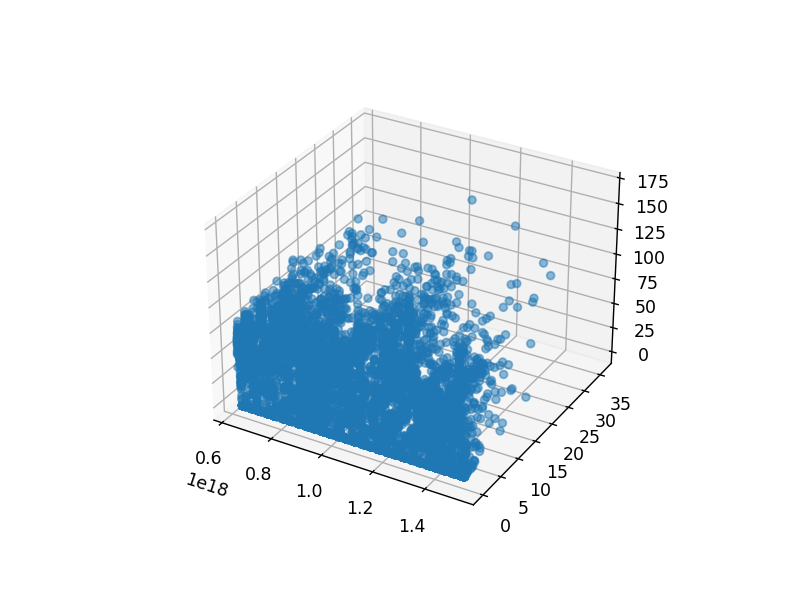

In [145]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pd.to_numeric(alta.DATE), ys=alta.SNOW, zs=alta.SNWD, alpha=.5)

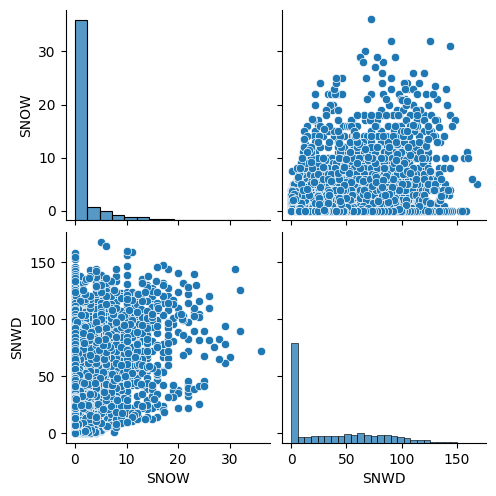

In [154]:
%matplotlib inline
# Personally try to avoid 3D (though interactivity helps)
# Alternative is to plot scatterplots of pairs of variables
# Annoying in Matplotlib ... but

import seaborn as sns
res = sns.pairplot(data=alta.reset_index()[['DATE', 'SNOW', 'SNWD']])
#res.axes[0][0].plot(range(10))

In [147]:
# notices the ``axes`` and ``fig``
print(dir(res))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_axis_labels', '_corner', '_despine', '_dropna', '_extract_legend_handles', '_figure', '_find_numeric_cols', '_get_palette', '_hue_order', '_hue_var', '_legend_data', '_legend_out', '_map_bivariate', '_map_diag_iter_hue', '_margin_titles', '_orig_palette', '_plot_bivariate', '_plot_bivariate_iter_hue', '_tight_layout_pad', '_tight_layout_rect', '_update_legend_data', 'add_legend', 'apply', 'axes', 'data', 'diag_axes', 'diag_sharey', 'diag_vars', 'fig', 'figure', 'hue_kws', 'hue_names', 'hue_vals', 'legend', 'map', 'map_diag', 'map_lower', 'map_offdiag', 'map_upper', 'palette', 'pipe', 'savefig', 'set', 'square_grid', 'tick_params', 'tight_lay

Text(0.5, 1.0, 'Pandas plot of Snowdepth')

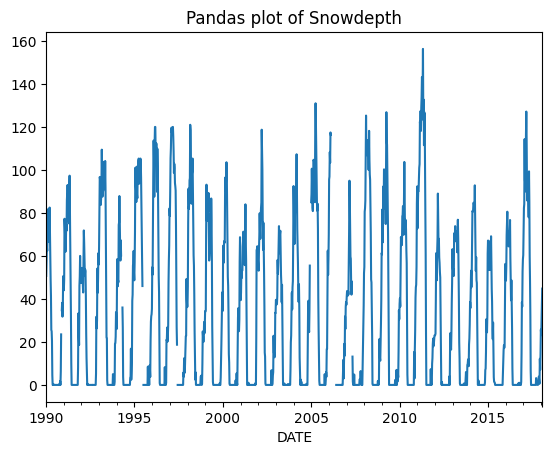

In [148]:
%matplotlib inline
%matplotlib inline

# pandas
ax = y.plot()
ax.set_title('Pandas plot of Snowdepth')

Text(0.5, 1.0, 'Pandas plot of Snowdepth')

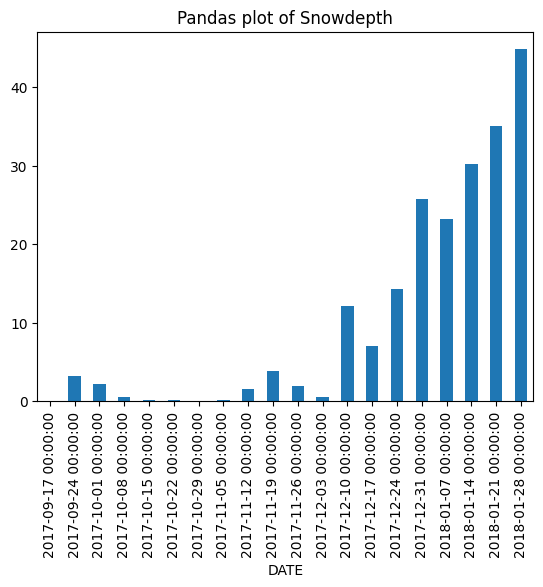

In [149]:
%matplotlib inline

# pandas
ax = y.iloc[-20:].plot.bar()
ax.set_title('Pandas plot of Snowdepth')

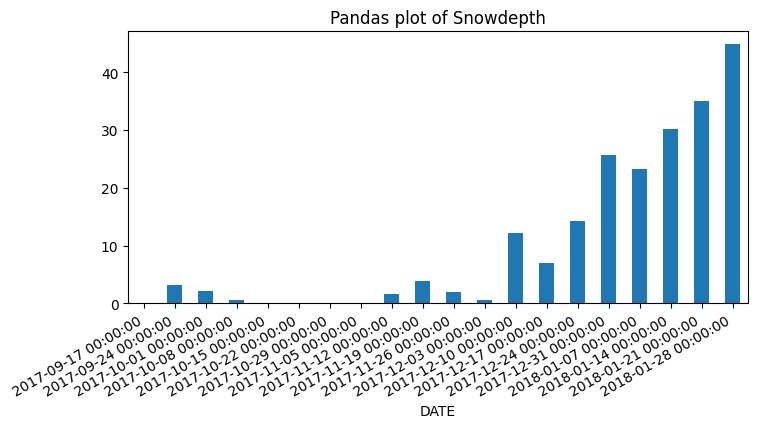

In [150]:
%matplotlib inline

# pandas
ax = y.iloc[-20:].plot.bar()
ax.set_title('Pandas plot of Snowdepth')
fig = ax.get_figure()
fig.set_size_inches(8,4)
fig.autofmt_xdate()

Text(0.5, 1.0, 'Pandas plot of Snowdepth')

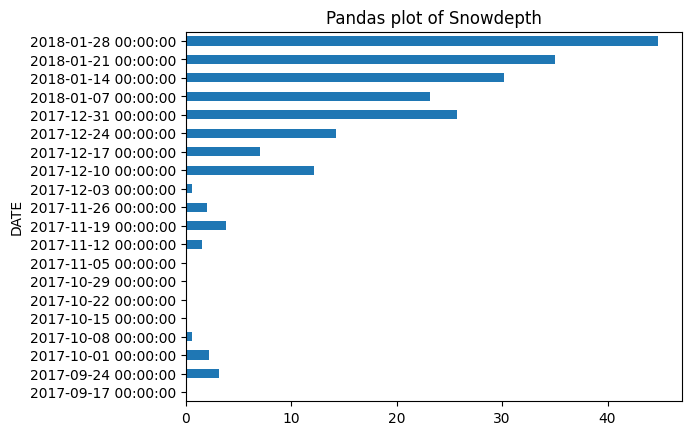

In [151]:
%matplotlib inline

# pandas
ax = y.iloc[-20:].plot.barh()
ax.set_title('Pandas plot of Snowdepth')

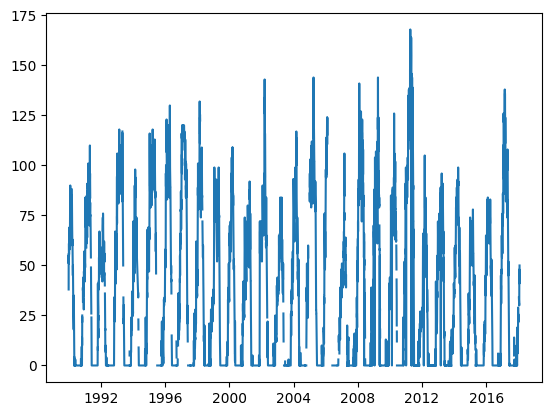

In [152]:
# note Matplotlib as of 1.5 has some support for pandas DataFrames
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot('DATE', 'SNWD', data=alta)  
#ax.plot(x='DATE', y='SNWD', data=alta)  # fails!

## Other options for Plotting
* Bokeh - Aimed at HTML plots (interactive)
* Plotly - Service for plotting
* Altair - Declarative visualization

## Exercise: 3D and Pandas
* Plot a 3D scatter plot with the ``nyc`` dataset, plotting 'Mean TemperatureF', ' Mean Humidity', and 'EST' (Hint might need to limit the number and only look at 1_000 or so)


## ExxonMobil Style Sheet
Default style sheet to load when plotting with Jupyter and python

In [97]:
# Default style is stored here
print(plt.rcParamsDefault)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

In [ ]:
# style loading done at import time. need to reload
import importlib, os
folder = os.path.join(matplotlib.get_configdir(), 'stylelib')
if not os.path.exists(folder):
    os.mkdir(folder)
cfg_name = os.path.join(folder, 'xom.mplstyle')
with open(cfg_name, 'w') as fout:
    fout.write("""
axes.labelsize : 10
lines.linewidth : 0.8
xtick.labelsize : 10
ytick.labelsize : 10
axes.spines.right: False
axes.spines.top: False
font.size: 12
font.family: emprint
legend.frameon: False
lines.color: #0C479D
lines.markersize: 5.0
lines.markeredgecolor: auto
lines.markeredgewidth: 0.8
patch.edgecolor: #FFFFFF
patch.facecolor: #0C479D
scatter.edgecolors: face
    """)
print(cfg_name)
plt.style.reload_library()

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


C:\Users\KNHOFFM\.matplotlib\stylelib\xom.mplstyle


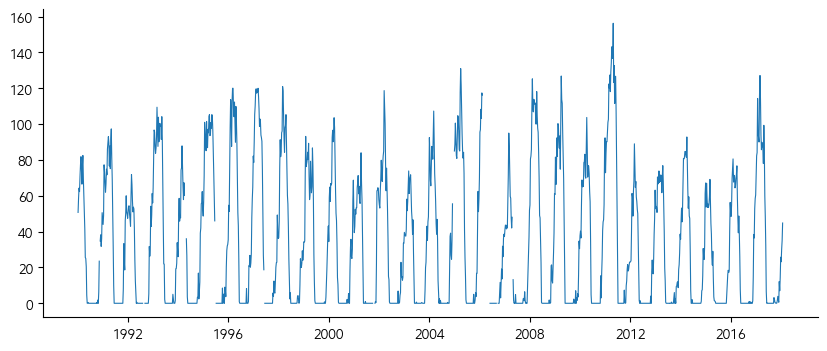

In [98]:
with plt.style.context('xom'):
    fig, ax = plt.subplots(figsize=(10,4))
    # these fail in Jupyter currently (Sep 2018 - https://github.com/jupyter/notebook/issues/3385)
    matplotlib.rcParams['grid.color'] = 'r'
    matplotlib.rcParams['grid.linestyle'] = ':'
    matplotlib.rc('grid', color='r', alpha=1, linestyle='-', linewidth=1)
    res = ax.plot(x, y)

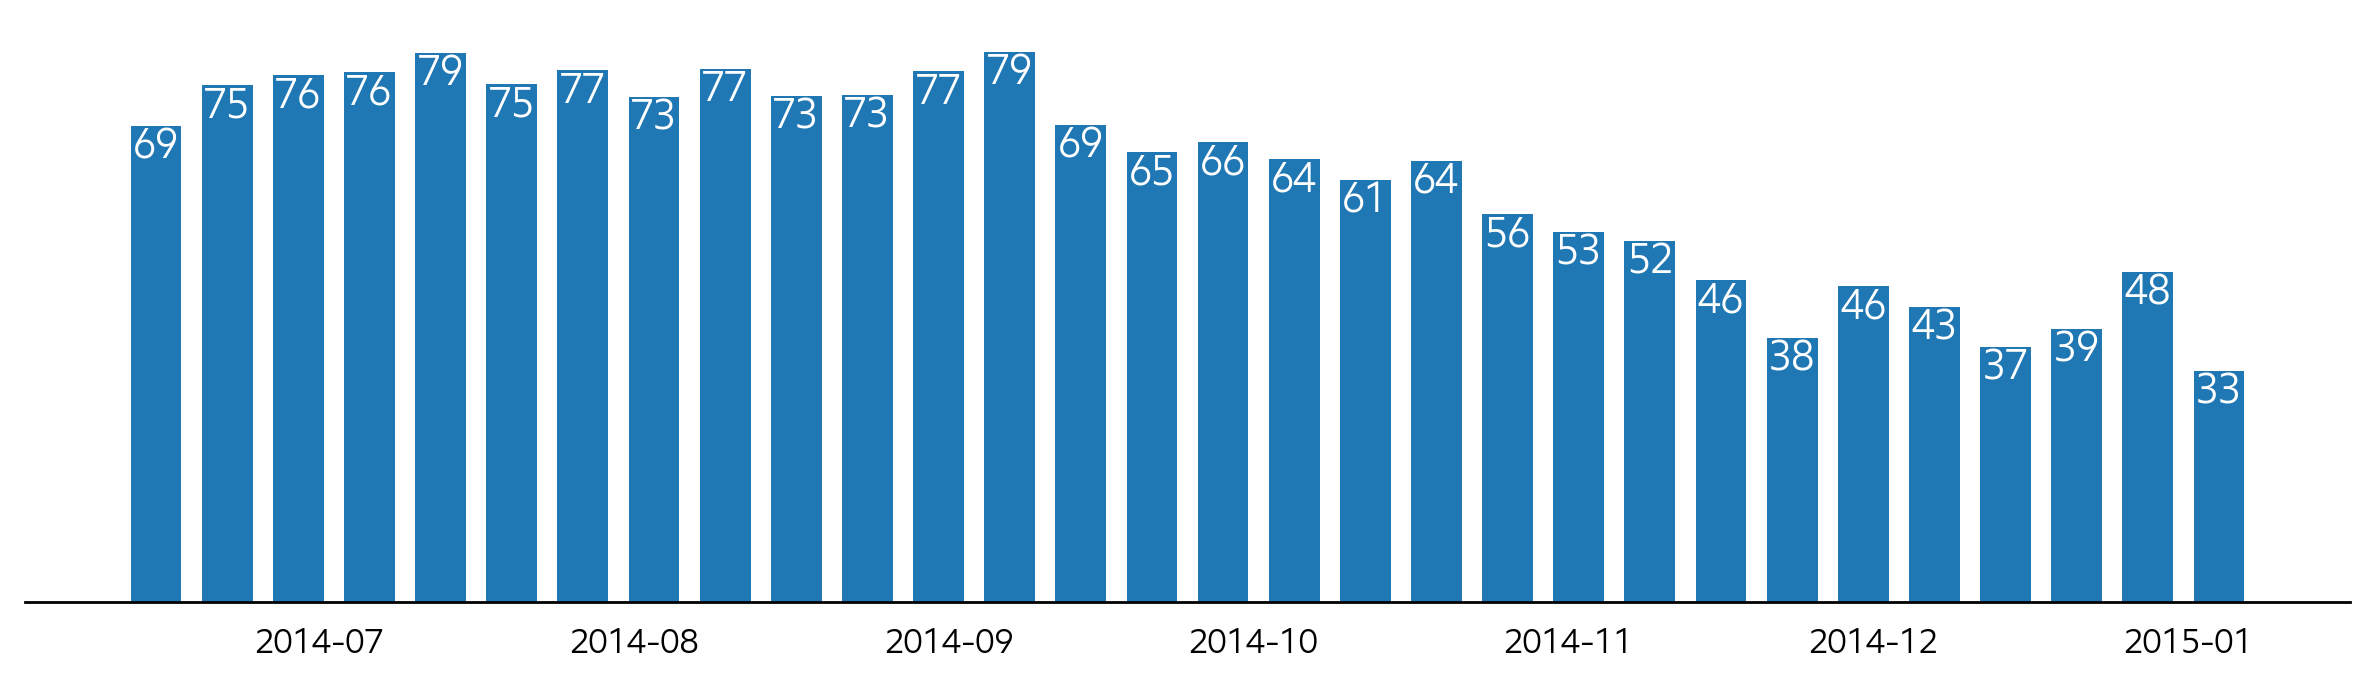

In [99]:
with plt.style.context('xom'):
    fig, ax = plt.subplots(figsize = (12,3), dpi=250)

    # color fun
    # colors = ['#999999' if val >= 40 else 'pink' for val in c3 ] # list comprehension
    # colors[c3.index.get_loc(c3.idxmin())] = 'b'
    # colors[c3.index.get_loc(c3.idxmax())] = 'r'

    # could use a column assigned hex or color code in python to assign color as well
    # c3.assign(colors = lambda )

    p1 = ax.bar(c3.index,c3, width = 5)

    # for pos, value, in c3.iteritems():
    #     ax.text(pos, value - 5, f'{value:.0f}', ha='center', color='white')

    ax.tick_params(bottom=False, left=False, labelleft=False)
    for side in ['top', 'left', 'right']:
        ax.spines[side].set_visible(False)

    _ = ax.bar_label(p1, fmt='%.0f', padding=-12, color='white')

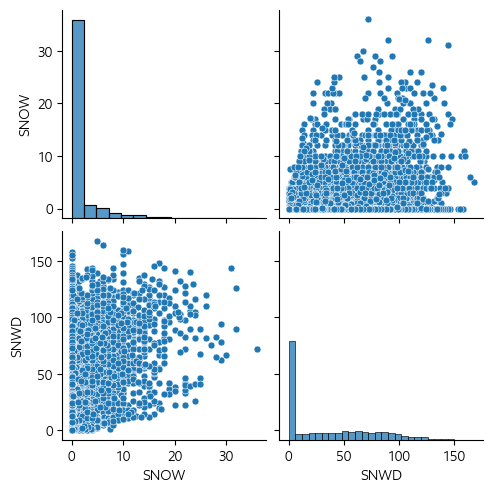

In [100]:
with plt.style.context('xom'):
    res = sns.pairplot(data=alta.reset_index()[['DATE', 'SNOW', 'SNWD']])

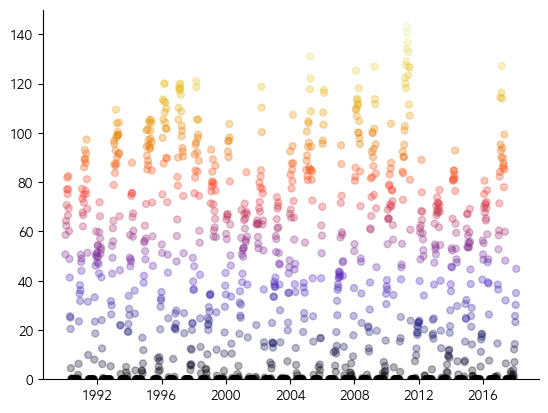

In [101]:
# colormaps (useful on scatter plots)
with plt.style.context('xom'):
    fig, ax = plt.subplots()
    ax.set_ylim((0, 150))
    ax.scatter(x, y, alpha=.3, c=y, cmap='CMRmap')